<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 1 Redes Neuronales Artificiales - 2020-1 </h1>

<H3 align='center'> Integrantes: Paula Nieto - Gabriela Sepúlveda </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Redes Densas Feed Forward
* Regularización y Dropout
* Exploding & Vanishing Gradient
* Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Augmentation
* Interpretabilidad CNNs


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea1]
* Fecha de entrega y presentaciones: 13 de Noviembre. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Conceptos básicos de redes neuronales  <br>
[2.](#segundo) Reconocimiento de lenguaje de señas <br>
[3.](#tercero) Interpretabilidad de CNNs, transfer learning, y skip connections <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes feedforward y GPU para redes convolucionales.*.

# 1. Conceptos básicos de redes neuronales

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa están conectadas a todas las salidas de la capa anterior y envían su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más fácil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta área del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades, learning rate, etc...; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient y el _exploding gradient_, viendo también algunos optimizadores existentes.


<h1 align='center'> <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/water-flea-daphnia-magna-ted-kinsman.jpg" width="40%" height="30%" /> </h1>

Para realizar esto usaremos un problema de regresión sencillo y utilizaremos los paquetes tensorflow y keras para explorar los conceptos básicos del mundo de las redes neuronales artificiales. Dado que puede tomar tiempo entrenar redes neuronales, y existe una amplia gama de conceptos a cubrir, utilizaremos un dataset de tamaño limitado con menos de 1000 observaciones, recordar que las redes neuronales tienen una naturaleza _data hungry_ por lo que su desempeño se puede ver limitado por la poca cantidad de observaciones en algunos casos. El dataset en cuestión consiste de 8 atributos (descriptores moleculares) de 546 productos químicos usados para predecir la toxicidad acuática aguda hacia la especie Daphnia Magna, para su descarga y descripción más detallada: https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity.

## 1.a Carga de datos y preprocesamiento.

##### I) Partiremos cargando los datos. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files   #-> For Google Colab, there are other methods
import io
uploaded = files.upload()
header_list = ["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050","LC50-response"]
df2 = pd.read_csv(io.BytesIO(uploaded['qsar_aquatic_toxicity.csv']),names=header_list,sep=";")

Saving qsar_aquatic_toxicity.csv to qsar_aquatic_toxicity.csv


In [ ]:
# Desactivar para ver los mensajes de warning
import warnings
warnings.filterwarnings('ignore')

##### II) **Comente y visualice** las distribuciones de cada atributo del dataset utilizando herramientas estadísticas básicas, boxplots e histogramas.

In [ ]:
df2.describe()

,TPSA,SAacc,H-050,MLOPG,RDCHI,GATS1p,nN,C-050,LC50-response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


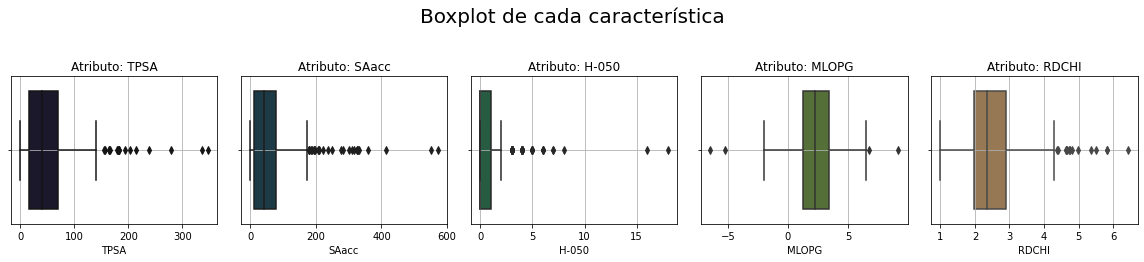

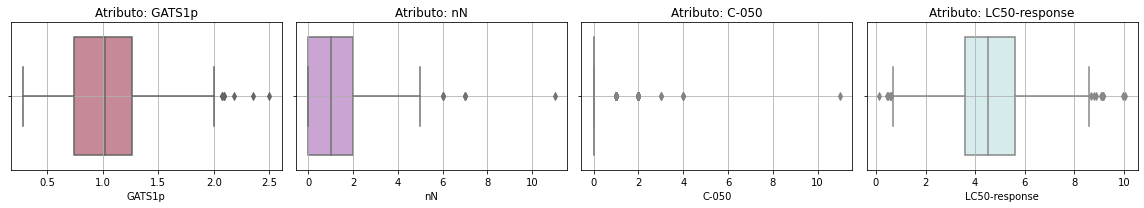

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,3] # <- Controla el tamaño del plot dentro del Notebook
import seaborn as sns  # <- Herramienta complementaria para distintos tipos de plots
cols=sns.color_palette("cubehelix", 9) # <-Paleta de colores a utilizar 9 es el número de colores que componen la paleta
plt.suptitle('Boxplot de cada característica',size=20,y=1.2)
k,K=1,1
for i in df2.columns[:]:
  if K<=5: plt.subplot(1,5,k)
  else: plt.subplot(1,4,k)
  plt.title('Atributo: '+str(i))
  sns.boxplot(df2[i],color=cols[K-1])
  plt.tight_layout()
  plt.grid()
  if k==5:
      k=1
      K+=1
      plt.show()
  else:
      k+=1
      K+=1

ATRIBUTO: TPSA


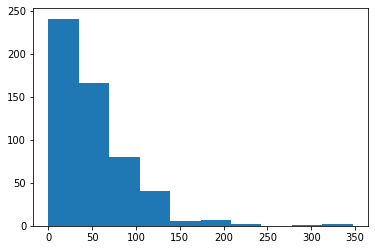

ATRIBUTO: SAacc


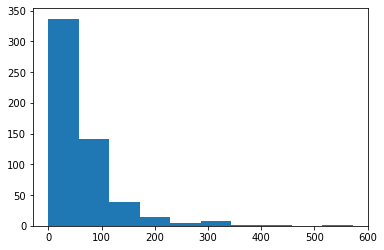

ATRIBUTO: H-050


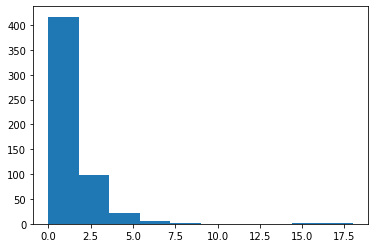

ATRIBUTO: MLOPG


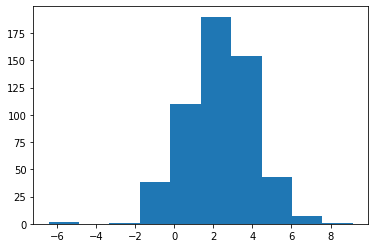

ATRIBUTO: RDCHI


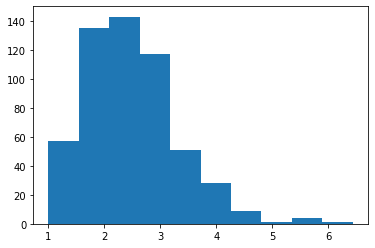

ATRIBUTO: GATS1p


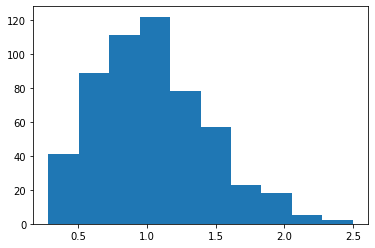

ATRIBUTO: nN


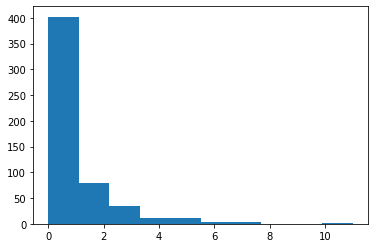

ATRIBUTO: C-050


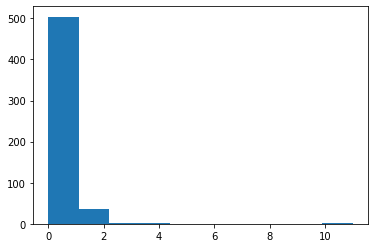

ATRIBUTO: LC50-response


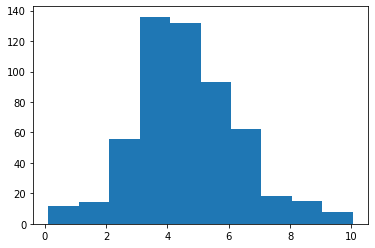

In [ ]:
for j in range(9):
  print('ATRIBUTO: %s'%(df2.columns[j]))
  plt.hist(df2[df2.columns[j]])
  plt.show()

**Comentarios:**

El bloxplot nos permite visualizar rápidamente cómo se distribuyen estos atributos a través de sus cuartiles. En términos generales para todas las características vemos la presencia de valores atípicos, pero si hacemos el estudio en detalle podemos observar:
- **TPSA**: (Sesgada a la derecha) Vemos como la mediana está cercana al valor ~40, con una concentración de los datos entre ~15 y ~70. También vemos la presencia de varios valores atípicos hacia el extremo superior de estos, incluso algunos llegando a sextiplicar el valor promedio. 
- **SAacc**: (Sesgada a la derecha) En esta característica vemos un comportamiento bastante similar al anterior, pero los datos tienden a fluctuar entre ~10 y ~75. Lo que si podemos ver, es una mayor presencia de valores atípicos (también en el extremo superior).
- **H-050**: (Sesgada a la derecha) Aquí podemos ver valores que están mucho más concentrados (en este caso particular entre el 0 y el 1), y también contamos con la presencia de valores atípicos que se van hacia el extremo superior. Y aunque si bien encontramos la mayoría de estos valores relativamente cercanos al 'bigote' superior, podemos ver dos valores que se escapan un poco.
- **MLOPG**: (Relativamente normalizada) En este caso en particular podemos observar una distribución bastante 'normalizada', en donde los datos se concentran en el centro del gráfico (~1 y ~3) y tenemos un par de datos atípicos en ambos extremos.
- **RDCHI**: (Normalizada con ligero sesgo a la derecha) Con este atributo aparece algo similar a lo que observamos en los primeros atributos, concentrando sus datos entre el valor ~2 y ~3; y con la presencia de valores atípicos hacia el extremo superior.
- **GATS1p**: (Normalizada con ligero sesgo a la derecha) La misma tendencia anterior, donde los datos se concentran entre el valor ~0.7 y ~1.3, la mediana muy marcada en en valor 1. Y vemos valores atípicos hacia el extremo superior.
- **nN**: (Sesgo a la derecha) Se repite la tendencia, con la salvedad de que no encontramos un bigote inferior, los datos se concentran entre 0 y 2, mediana en 1 y valores atípicos hacia el extremo superior.
- **C-050**. (Sesgo a la derecha) En este caso ocurre algo muy interesante, ya que la mayoría de los datos toman el valor 0, y sólo encontramos un par de casos atípicos q escapan de este valor, pudiendo ir de 0 a 11. Pero se repite, son casos muy particulares, pues prácticamente todos los datos toman el valor 0.
- **LC50-response**: (Relativamente normalizada) Finalmente, en este atributo, volvemos a encontrarnos con una distribución normalizada donde los datos se concentran al centro del gráfico entre los valores ~3.5 y ~5.5 con datos atípicos en los extremos que van disminuyendo al alejarse del centro.

##### III) **Separe** el dataset en conjuntos de entrenamiento, validación y test, para luego estandarizar, considere un 70% de los datos para entrenamiento, un 20% para validación y un 10% para test. Para esto puede utilizar la librería sklearn, en particular las funciones StandarScaler y train_test_split. **Verifique** que el tamaño de los conjuntos se asemeje al indicado. 

**Pregunta:** ¿Cuál es la función de cada uno de estos conjuntos?

Para aclarar conceptos acerca de estos conjuntos: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

**Respuesta:**

Cada uno de estos conjuntos tiene un objetivo distinto que será detallado a continuación:
- **Training Set (70%)**: El set de entrenamiento tiene como objetivo ser utilizados para ajustar, es decir, tal como su nombre indica, entrenar el modelo. En palabras muy sencillas el modelo ve y aprende de este set de datos.
- **Validation Set (20%)**: El set de validación nos ayuda a realizar evaluaciones sobre el modelo mientras los parámetros de éste son ajustados. En otras palabras, el modelo no aprende de estos datos, sino que estos datos son utilizados para hacer una validación y actualización de los parámetros del modelo. Es un set de datos que nos va ayudar durante el 'desarrollo' de nuestro modelo.
- **Test Set (10%)**: El set de prueba nos proporciona una evaluación del ajuste final del modelo en el set de entrenamiento. Vale decir, una vez que hemos entrenado el modelo con nuestro set de entrenamiento y hemos validado y ajustado los parámetros con nuestro set de validación, se procede a realizar (una sola vez) la evaluación final del modelo con este set de prueba. Muchas veces, este set contiene datos que han sido cuidadosamente muestreados, con el fin de poder abarcar las diferentes clases a las que se verá enfrentado el modelo en la realidad.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x=df2.drop(columns=['LC50-response'])
y=np.asarray(df2['LC50-response']).reshape(-1,1)

np.random.seed(1) #Se colocó una semilla para que las respuestas tuvieran coherencia con los resultados obtenidos. 
pre_x_tr, pre_x_test, pre_y_tr, pre_y_test  = train_test_split(x, y, test_size=0.1, shuffle=True)
pre_x_tr, pre_x_val, pre_y_tr, pre_y_val = train_test_split(pre_x_tr, pre_y_tr, test_size=0.2/0.9, shuffle=True)

In [ ]:
scaler_x = StandardScaler()
scaler_x.fit(pre_x_tr)
x_tr = scaler_x.transform(pre_x_tr)
x_val = scaler_x.transform(pre_x_val)
x_test = scaler_x.transform(pre_x_test)

scaler_y = StandardScaler()
scaler_y.fit(pre_y_tr.reshape(-1,1))
y_tr = scaler_y.transform(pre_y_tr)
y_val = scaler_y.transform(pre_y_val)
y_test = scaler_y.transform(pre_y_test)


**Verificación de tamaño de conjuntos**

In [ ]:
x_original_size = len(x)
x_tr_size, x_val_size, x_test_size = (100 / x_original_size)*len(x_tr), (100 / x_original_size)*len(x_val), (100 / x_original_size)*len(x_test)
print('Para x (size=%d):'%x_original_size)
print('\t- Train Set > %f%%\n\t- Validation Set > %f%%\n\t- Test Set > %f%%\n'%(x_tr_size,x_val_size,x_test_size))

y_original_size = len(y)
y_tr_size, y_val_size, y_test_size = (100 / y_original_size)*len(y_tr), (100 / y_original_size)*len(y_val), (100 / y_original_size)*len(y_test)
print('Para y (size=%d):'%y_original_size)
print('\t- Train Set > %f%%\n\t- Validation Set > %f%%\n\t- Test Set > %f%%'%(y_tr_size,y_val_size,y_test_size))

Para x (size=546):
	- Train Set > 69.780220%
	- Validation Set > 20.146520%
	- Test Set > 10.073260%

Para y (size=546):
	- Train Set > 69.780220%
	- Validation Set > 20.146520%
	- Test Set > 10.073260%


Efectivamente se cumple que el tamaño de los conjuntos se asemeja a lo descrito en el enunciado.

##### IV) **Visualice** de la forma que estime conveniente para realizar comparaciones, las distribuciones para todas las variables (atributos y target) antes de estandarizar, y después de estandarizar para los conjuntos de entrenamiento, validación y test. **Comente**. 

ATRIBUTO: TPSA


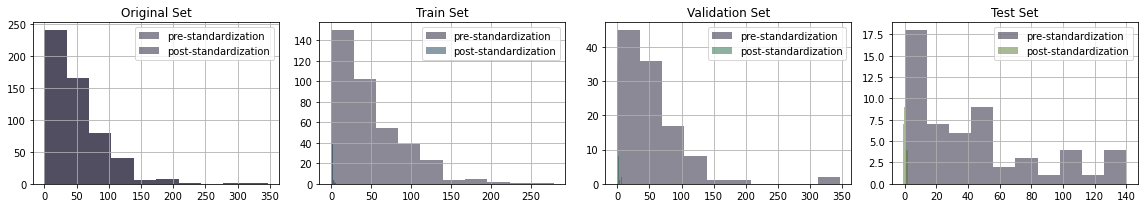


ATRIBUTO: SAacc


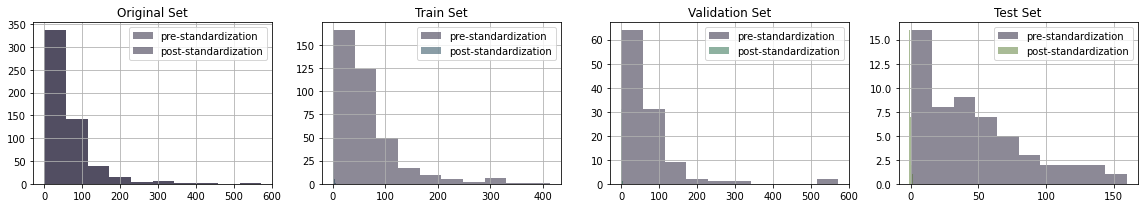


ATRIBUTO: H-050


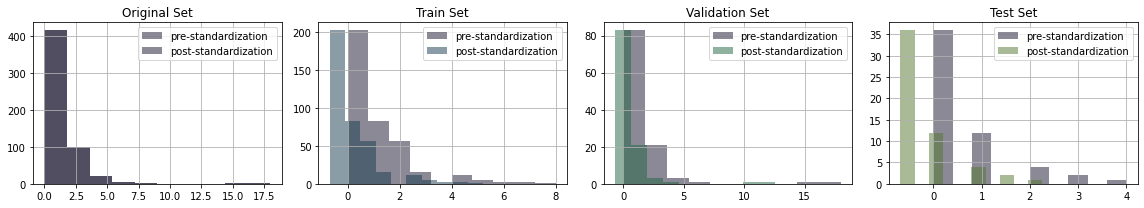


ATRIBUTO: MLOPG


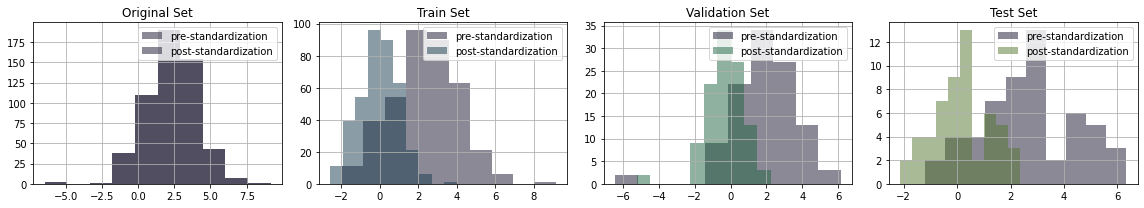


ATRIBUTO: RDCHI


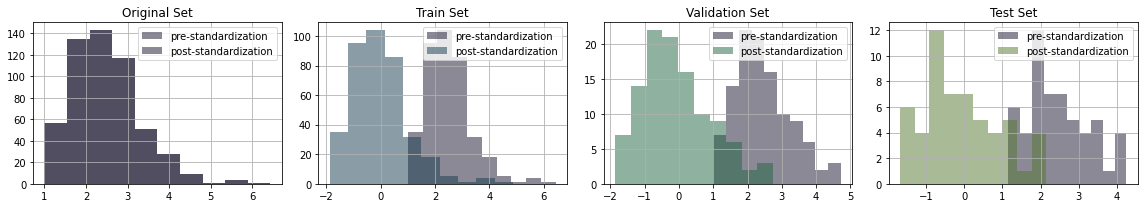


ATRIBUTO: GATS1p


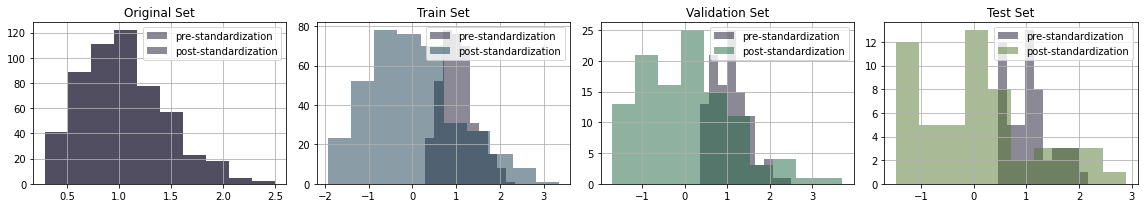


ATRIBUTO: nN


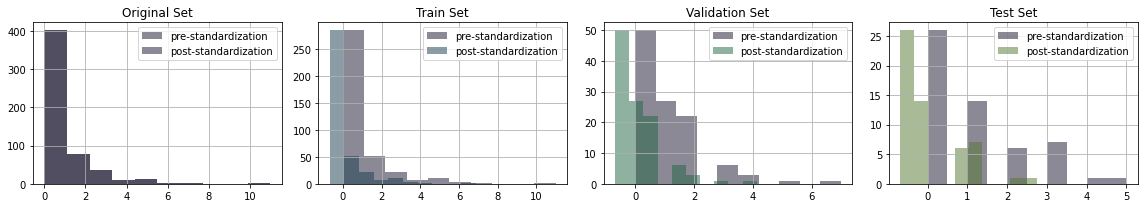


ATRIBUTO: C-050


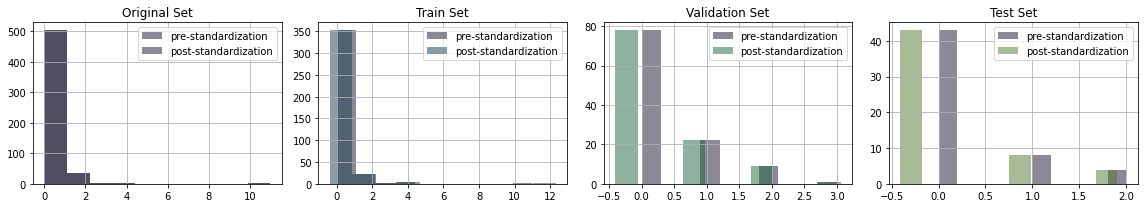

In [ ]:
for j in range(8): 
  print('ATRIBUTO: %s'%(x.columns[j]))
  vars=[np.asarray(x)[:,j],x_tr[:,j],x_val[:,j],x_test[:,j]]
  for k in range(4):
    plt.subplot(1,4,k+1)
    if k == 0:
      plt.title("Original Set")
      plt.hist(x[x.columns[j]], alpha=0.5, label='pre-standardization', color=cols[0])
    elif k == 1:
      plt.title("Train Set")
      plt.hist(pre_x_tr[x.columns[j]], alpha=0.5, label='pre-standardization', color=cols[0])
    elif k == 2:
      plt.title("Validation Set")
      plt.hist(pre_x_val[x.columns[j]], alpha=0.5, label='pre-standardization', color=cols[0])
    else:
      plt.title("Test Set")
      plt.hist(pre_x_test[x.columns[j]], alpha=0.5, label='pre-standardization', color=cols[0])
    #sns.boxplot(vars[k],color=cols[k])
    plt.hist(vars[k], alpha=0.5, label='post-standardization', color=cols[k])
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.grid()
  plt.show()
  print()

**Comentarios**

Podemos observar que luego de la estandarización de estos sets, las distribuciones de estos se tienden a acercar mas a una distribución normal. Algo muy curioso es lo que sucede con los atributos *TPSA* y *SAacc*, en donde podemos ver que la estandarización provoca que los datos se concentren en un rango mucho menor en comparación con el rango pre-estandarización (Es por ello que en el histograma son apenas apreciables)

##### V) **Pregunta:** ¿Por qué seleccionar los conjuntos de entrenamiento, validación y test _by hand_ es una mala práctica? ¿Qué beneficios _tramposos_ se pueden obtener de esta mala práctica?.

**Respuesta**

Es una mala práctica porque va a viciar los resultados. Y es que si seleccionamos a mano el set con el que deseamos entrenar nuestro modelo, vamos a dirigir este modelamiento hacia un camino en específico que podría no ser el que esperamos. Podemos también, vernos enfrentados a la situación de que al elegir a mano el set para probar nuestro modelo, podríamos encontrarnos con un resultado 'mentiroso'. Es decir, tramposamente podríamos ver que nuestro modelo efectivamente tiene un buen desempeño sobre ese set de datos de prueba, pero lo cierto es que podría no ser así (Ya que estos datos fueron escogidos 'a mano').

##### VI) **Bonus:** Tome decisiones, p.ej realice transformaciones, manipulaciones, etc... de manera fundamentada que ayuden a mejorar la conformación de los conjuntos para el posterior entrenamiento de la red neuronal. Evite malas prácticas.

**Respuesta**

Semilla utilizada en el punto anterior

## 1.b Primera arquitectura

Partiremos cargando los paquetes necesarios. Conozcamos tensorflow y keras:

_TensorFlow_ es una librería de computación matemática, que ejecuta de forma rápida y eficiente gráficos de flujo. Un gráfico de flujo está formado por operaciones matemáticas representadas sobre nudos, y cuya entrada y salida es un vector multidimensional (o tensor) de datos. 

_Keras_ es una abstracción, un API High-level, para la creación de modelos de aprendizaje. Aporta una sintaxis homogénea y un interface sencillo, modular y ampliable para la creación de redes neurales.

Las redes neurales son un tipo particular de gráfico de flujo de datos. Por tanto, TensorFlow y Keras combinan perfectamente.

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras import activations
from tensorflow.python.keras.engine import input_layer

##### I) Entrene la siguiente red neuronal de una capa con funciónes de activación sigmoidales, función de pérdida MSE, optimizador SGD, y learning rate=0.01 por 500 epochs. Este entrenamiento toma menos de 20 segundos en _Colab_ con entorno de ejecución TPU

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import History 

# Define architecture
input_dense= input_layer.Input(shape=(x_tr.shape[1]))
dense=layers.Dense(50, activation='sigmoid',use_bias=True)(input_dense)
output_dense=layers.Dense(1, activation='sigmoid',use_bias=True)(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Define callbacks (No modificar patience!!!!!!!!! es solo para que la conozcan por el momento)
my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] 

# Train model
hist_1_b_i = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks) 
#verbose=1 shows epoch per epoch evolution, not necessary if you are planning to plot hist

Note cómo se puede evaluar todo el conjunto de test en sólo un paso:

In [ ]:
y_pred=model(x_test) # model.predict(x_test) returns numpy array
test_batch_loss=tf.keras.losses.MSE(y_test, y_pred)

Note cómo se obtiene el error MSE para cada observación en el conjunto de test. Se introdujo a propósito la notación batch para definir la variable python, esta dimensión debe ser siempre la primera dimensión del tensor cuando entrenamos redes neuronales. Un batch es un conjunto de observaciones, dado que estamos tratando con la evaluación del conjunto de test se utilizó un batch de tamaño máximo (igual a la cantidad de observaciones del conjunto de test).

In [ ]:
test_batch_loss

<tf.Tensor: shape=(55,), dtype=float32, numpy=
array([2.75878370e-01, 7.61324823e-01, 3.58026475e-01, 2.01852556e-04,
       2.16049695e+00, 1.95926249e-01, 1.30833060e-01, 6.49140167e+00,
       3.17393869e-01, 2.91806683e-02, 2.96644052e-04, 1.05760887e-01,
       3.29911351e+00, 5.92262387e-01, 1.70253873e-01, 3.71750027e-01,
       4.65979004e+00, 5.64058363e-01, 2.78509647e-01, 4.53713443e-03,
       4.35408235e-01, 3.15460473e-01, 1.12579310e+00, 4.42754291e-02,
       1.84346050e-01, 3.24684560e-01, 6.88832998e-01, 6.67256498e+00,
       3.27839375e-01, 9.68375325e-01, 4.83664393e-01, 2.77285957e+00,
       2.70916271e+00, 1.99734890e+00, 9.29398715e-01, 2.01465040e-01,
       3.21440697e-01, 6.27437472e-01, 3.95922929e-01, 3.06495011e-01,
       3.58324349e-02, 9.59363937e-01, 1.32801548e-01, 1.68822721e-01,
       2.07376981e+00, 1.28222322e+00, 1.27003714e-01, 1.64101385e-02,
       6.74648955e-02, 5.25730546e-04, 4.92817581e-01, 1.88317892e-04,
       1.14216015e-01, 1.58721

Obtenga el error MSE promedio para todo el conjunto de test. **Aprecie** cómo se graficará el proceso de entrenamiento de la red neuronal, tendrá que repetir este proceso para reportar resultados múltiples veces durante el ramo. Utilizar verbose=1 para reportar resultados **NO ES VÁLIDO**, dado que es de difícil lectura y ocupa una cantidad de espacio innecesaria, se recomienda utilizar esta opción para estimar cuánto tiempo se demorará en entrenar la red viendo un par de epochs, luego se puede pausar el entrenamiento y desactivar el verbose para volver a entrenar. Esto no es obligatiorio y condicional de cuánto epochs se están entrenando, sin embargo considere que un entrenamiento por 1000 epochs puede ocupar el equivalente a 10 páginas pdfs, lo que dificultará la navegación por el archivo, pues no siempre es posible plegar el output de una celda (depende de cómo se está visualizando el archivo, p.ej al ver un notebook por github no se podrán plegar los outputs). **Comente** el gráfico generado, **Preguntas:** ¿existe overfitting? **¿Qué conclusiones puede sacar al observar el error del conjunto de test y compararlo respecto al conjunto de entrenamiento y validación?**

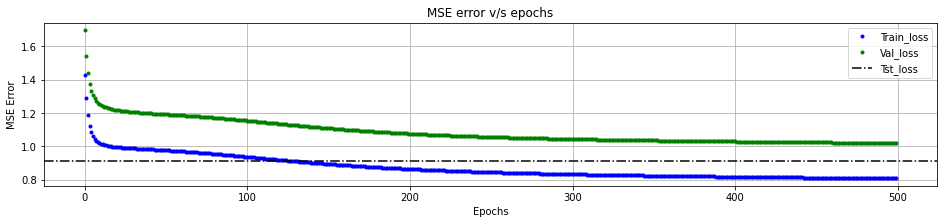

In [ ]:
test_loss_1_b_i=tf.math.reduce_mean(test_batch_loss).numpy() # .numpy() converts tensor to array, tf.convert_to_tensor converts array to tensor
plt.title("MSE error v/s epochs")
plt.plot(hist_1_b_i.history["loss"],"b.",label="Train_loss")
plt.plot(hist_1_b_i.history["val_loss"],"g.",label="Val_loss")
plt.axhline(y=test_loss_1_b_i,color="k",linestyle="-.",label="Tst_loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()
plt.show()

**Respuesta**

El error generado en el de entrenamiento es menor que el resto de los conjuntos, sin embargo, se considera que la diferencia que tiene con el error de test es muy pequeño (0.1 aproximadamente), además el error de validación no tiene pendiente positiva hasta el epoch 500, por lo que no existe overfitting. 

Se puede concluir que los errores de los conjuntos son altos ya que el target se mueve entre 3.5 y 5.5 por lo que un error de casi 1 es grande, este error puede deberse a que el número de datos es insuficiente o los conjuntos de datos obtenidos en la separación no permiten obtener un modelo que pueda predecir correctamente, ya que se observó que el resultado del entrenamiento y test pueden mejorar o empeorar según la división de los datos, por esta razón se utilizó una semilla. Además, es necesario realizar cambios para disminuir el error del test.


Para evitar reentrenar redes al reconectarse, la red neuronal entrenada se puede guardar (arquitectura, pesos, y configuración de entrenamiento) del siguiente modo: 

---> Para verificar que estamos guardando el modelo correctamente: Iniciaremos clonando el modelo, esta función copia la arquitectura del modelo pero no mantiene los pesos.

In [ ]:
model_clone=tf.keras.models.clone_model(model)
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[False, False, False, False]

----> Para esto setearemos los pesos del modelo clonado igual a los pesos del modelo original.

In [ ]:
model_clone.set_weights(model.get_weights())
[np.all(model_clone.get_weights()[i]==model.get_weights()[i]) for i in range(len(model.get_weights()))]

[True, True, True, True]

---> Procederemos a guardar el modelo

In [ ]:
import sys
sys.path.append('saved_model')

In [ ]:
model.save('saved_model/1_b_i')  #<- guardar modelo con pesos incluidos, cuidado con sobre escribir sobre modelos ya guardados
# esta función está por deprecarse, aún así de momento está funcionando
# existe la siguiente alternativa: 1) guardar los pesos del modelo model.save_weights("filepath"), 
# 2) luego al querer cargar el modelo se debe definir la arquitectura del modelo (la misma, e.d correr solo #define architecture en 1.b.i)  
# 3) usar model.set_weights(model.load_weights("filepath"))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1_b_i/assets


---> Verificamos

In [ ]:

model_new=tf.keras.models.load_model('saved_model/1_b_i/') #<- cargar modelo
[np.all(model_clone.get_weights()[i]==model_new.get_weights()[i]) for i in range(len(model_new.get_weights()))] # <- verificar

[True, True, True, True]

##### II) **Entrene** una red neuronal con los mismos hiperparámetros que en la sección anterior pero con función de activación ReLU.

In [ ]:
# Architecture 
input_dense= input_layer.Input(shape=(x_tr.shape[1]))
dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] 
# Train model and test
hist_1_b_ii = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks) 
test_loss_1_b_ii=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
# Guardar
model.save('saved_model/1_b_ii')

INFO:tensorflow:Assets written to: saved_model/1_b_ii/assets


##### III) **Cree** una función que grafique los resultados, puede basarse en el siguiente código. La función creada la puede ir modificando en los siguientes items para reducir esfuerzos (fijarse en que la visualización sea lo más clara posible). **Visualice y compare** los resultados con los obtenidos en el punto 1.b.I). **Comente**.

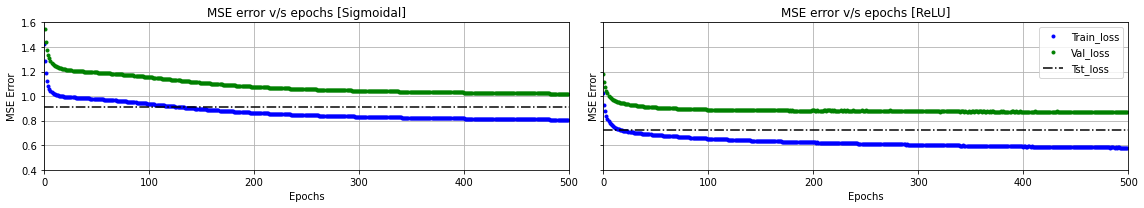

In [ ]:
plt.rcParams["figure.figsize"]=[16,3]
hists=[hist_1_b_i.history,hist_1_b_ii.history]
tsts=[test_loss_1_b_i,test_loss_1_b_ii]
titles=["MSE error v/s epochs [Sigmoidal]","MSE error v/s epochs [ReLU]"]
def graph_results(hists,tsts,titles):
  fig, axes = plt.subplots(1, len(hists), sharey=True) # sharey to keep the same y lims for all subplots. 
                                            # En algunos casos esto puede jugar en contra para una buena visualización -> ver siguiente comentario
  for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.plot(hists[i]["loss"],"b.",label="Train_loss")
    ax.plot(hists[i]["val_loss"],"g.",label="Val_loss")
    ax.axhline(y=tsts[i],color="k",linestyle="-.",label="Tst_loss")
    ax.set_xlabel("Epochs"),ax.set_ylabel("MSE Error")
    ax.set_ylim([0.4, 1.6])  # Se ajustan los límites inferiores y superiores
    ax.set_xlim([0,500]) # Se ajustan los epochs
    if i==len(axes)-1: ax.legend()
    ax.grid()
  plt.tight_layout()
  plt.show()

graph_results(hists,tsts,titles) # llamado simple para graficar

**Comparación y Comentarios**

Utilizando un modelo con la función de activación ReLU se logró disminuir el error del conjunto de test, por lo que considerando el resultado anterior como baseline, se puede decir que este modelo es mejor.

Los beneficios de ReLu por sobre la sigmoidal, es la sparsity que permite que RelU active o no completamente ciertas neuronas, mientras que la función de activación sigmoidal tiene una curva más suave útil para la clasificación. En este caso, la sparsity permite mejorar la habilidad de generalización de la red neuronal ya que puede representar mejor los datos sin overfitting. 

Otro problema que se puede dar con la funcion de activación sigmoidal es que el gradiente se puede desvanecer, restringiendo el aprendizaje de la red neuronal. Sin embargo, ayuda a controlar la activación, ya que ReLU no tiene límite por lo que puede explotar la activación.


## 1.c Sensibilidad a hiperparámetros

##### I) **Utilice** la siguiente función (o implemente una propia) para **recopilar** el error de entrenamiento, validación y test **según** el número de capas en la red neuronal y el número de neuronas. Considere el mismo número de neuronas para cada capa. Seleccione dos valores para la cantidad de neuronas entre 10 y 100, y varíe la profundidad entre 1 y 3, e.d 6 redes en total. Utilice la f° de activación ReLU, 500 epochs, lr=0.01, y error MSE. **Encuentre los hiperparámetros (n° neuronas y profundidad) que obtienen el menor error de validación**. 

**Pregunta:** ¿Por qué el menor error de validación y no de test?

**Visualice** y **Comente** los resultados.

In [ ]:
def train_network_1_c_i(prof_dense,n_neurons):
  input_dense=input_layer.Input(shape=(x_tr.shape[1]))
  for i in range(prof_dense):
    if i==0:
      dense=layers.Dense(n_neurons, activation='relu',use_bias=True)(input_dense)
    else:
      dense=layers.Dense(n_neurons, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  # Compile model
  model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
  # define callbacks (keep patience at 100)
  my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] # Returns best validation loss
  # Train model
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

**Procedimiento**: Debido a la cantidad de opciones que se pueden tomar, se decidió que se van a entrenar con todos los hiperparámetros posibles, es decir, se variará la cantidad de neuronas de 10 a 100 y las capas de 1 a 3, para obtener los que generen menor error de validación. Realizar esto es bastante costoso, ya que toma alrededor de 30 minutos, **por lo que no recomendamos ejecutarlo**.

In [ ]:
val_error = np.zeros((3, 91))

for i in range(3):
  for j in range(10, 101):
    h1, t1 = train_network_1_c_i(i+1, j)
    min_val_loss_1=np.min(h1.history["val_loss"])
    val_error[i][j-10] = min_val_loss_1

In [ ]:
val_errors = val_error.copy() 
min_values = np.sort(val_errors.reshape((3*91)))[:2]

neurons1, depth1 = np.where(val_error == min_values[0])[1][0]+10, np.where(val_error == min_values[0])[0][0]+1
neurons2, depth2 = np.where(val_error == min_values[1])[1][0]+10, np.where(val_error == min_values[1])[0][0]+1

print(neurons1, depth1)
print(neurons2, depth2)

A continuación, se muestra el **resultado** de las 6 redes neuronales con los hiperparámetros que tienen menor error y sus respectivos gráficos.

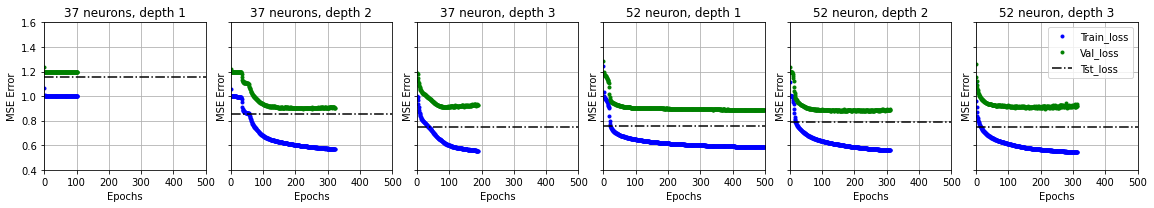

In [ ]:
# 6 neural networks with 37 neurons and 52 neurons
h1,t1=train_network_1_c_i(1,37)
h2,t2=train_network_1_c_i(2,37)
h3,t3=train_network_1_c_i(3,37)
h4,t4=train_network_1_c_i(1,52)
h5,t5=train_network_1_c_i(2,52)
h6,t6=train_network_1_c_i(3,52)

titles=["37 neurons, depth 1","37 neurons, depth 2", "37 neuron, depth 3","52 neuron, depth 1", "52 neuron, depth 2","52 neuron, depth 3"]
graph_results([h1.history,h2.history,h3.history,h4.history,h5.history,h6.history],[t1,t2,t3,t4,t5,t6],titles)

**Respuestas**

El menor error de validación, se produce con 52 neuronas y 2 capas de profundidad.

Se definen los hiperparámetros que obtienen el menor error de validación, debido a que si se utiliza el error de test, no habría como testear realmente el modelo, ya que se estaría haciendo trampa al definir de antemano los mejores hiperparámetros conociendo el resultado, por lo que no se mediría el desempeño de la data futura.

**Comentarios**

Se puede ver en el gráfico que en general el error de entrenamiento es bastante bajo. Sin embargo, cuando se utilizan 3 capas, el error de validación tiene una pendiente positiva, por lo que se ve que seguirá aumentando si se aumentan las epochs. Esto indica que la red neuronal está comenzando a sobreajustarse a los datos, lo cual es un problema que puede deberse a que la red está memorizando el conjunto de datos debido al tamaño.

También, se puede observar que a pesar de que las 52 neuronas con 2 capas de profundidad generaron un menor error de validación, las otras redes pueden generar un menor error en el conjunto de test. Esto muestra que elegir los hiperparámetros en base al error de validación, no garantiza que la predicción sea la mejor.

##### II) **Realice** un experimento similar, ahora variando el learning rate entre [1e-6 y 1e-1], entrene 6 redes neuronales con distintos learning rate. Para esto **implemente una función** semejante a la utilizada en el punto anterior, use la arquitectura e hiperparámetros dados. **Encuentre el learning rate que obtiene el menor error de validación. Visualizar y comentar**

In [ ]:
def train_network_1_c_ii(learning_rate):
  # Architecture
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  # Compile model
  model.compile(optimizer=SGD(learning_rate=learning_rate),loss='mean_squared_error')
  my_callbacks = [History(), # Returns validation and training loss
      tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss", # Mantener patience en 200
                                      restore_best_weights=True)]
  # Train model
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

Errores de validación:  1.3799024820327759 1.3793200254440308 1.1438487768173218 0.929227352142334 0.8531975746154785 0.8723531365394592


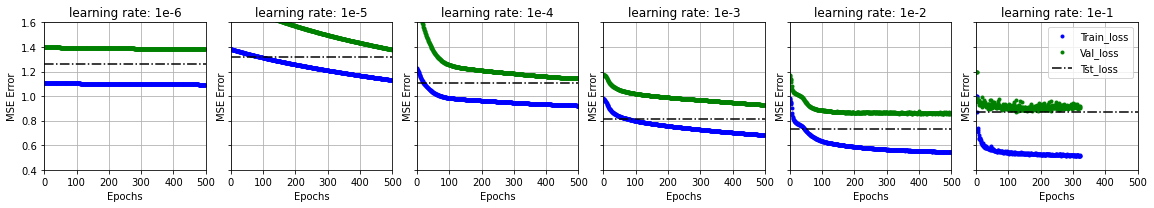

In [ ]:
# 6 neural networks with differents learning rates
h1, t1 = train_network_1_c_ii(1e-6)
min_val_loss_1=np.min(h1.history["val_loss"])
h2, t2 = train_network_1_c_ii(1e-5)
min_val_loss_2=np.min(h2.history["val_loss"])
h3, t3 = train_network_1_c_ii(1e-4)
min_val_loss_3=np.min(h3.history["val_loss"])
h4, t4 = train_network_1_c_ii(1e-3)
min_val_loss_4=np.min(h4.history["val_loss"])
h5, t5 = train_network_1_c_ii(1e-2)
min_val_loss_5=np.min(h5.history["val_loss"])
h6, t6 = train_network_1_c_ii(1e-1)
min_val_loss_6=np.min(h6.history["val_loss"])

print("Errores de validación: ",min_val_loss_1, min_val_loss_2, min_val_loss_3, min_val_loss_4, min_val_loss_5, min_val_loss_6)

titles=["learning rate: 1e-6","learning rate: 1e-5", "learning rate: 1e-4","learning rate: 1e-3", "learning rate: 1e-2","learning rate: 1e-1"]
graph_results([h1.history,h2.history,h3.history,h4.history,h5.history,h6.history],[t1,t2,t3,t4,t5,t6],titles)

**Respuestas**

Los learning rates que se evaluaron fueron 1e-6, 1e-5, 1e-4, 1e-3, 1e-2 y 1e-1. Donde el learning rate con menor error de validación es 1e-2. En este caso, se da que con ese learning rate se da el menor error de test.

**Comentarios**

Como se observa en los primeros 3 gráficos donde se tiene un learning rate pequeño, se ve que a medida que aumenta el valor, disminuye el error de todos los conjuntos. Esto puede deberse a que requiere más epochs para alcanzar un error más pequeño, ya que tarda más en aprender que un learning rate mayor.

Ahora, observando los últimos 3, se ve un error mucho más pequeño por lo que se puede decir que aprenden más rápido que los anteriores. Sin embargo, en el último gráfico se ve que el error de validación ya no se puede ver como una curva, los valores están más dispersos. Es por esto que el mejor learning rate es 1e-2.

##### III) **Realice** un experimento similar, ahora variando el learning decay, entrene 6 redes neuronales para distintos decay. Para esto **implemente una función** semejante a la utilizada en el punto anterior. **Encuentre el learning decay que obtiene el menor error de validación. Visualizar y comentar**

In [ ]:
def train_network_1_c_iii(learning_decay):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=SGD(learning_rate=0.01, decay=learning_decay),loss='mean_squared_error')

  my_callbacks = [History(), # Returns validation and training loss
      tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss", # Mantener patience en 200
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

Learning decay:  [1.0000e-06 1.6000e-05 2.5100e-04 3.9810e-03 6.3096e-02 1.0000e+00]
Errores de validación:  0.8634985089302063 0.890047550201416 0.8826547265052795 0.9309499859809875 0.9828964471817017 1.3159093856811523


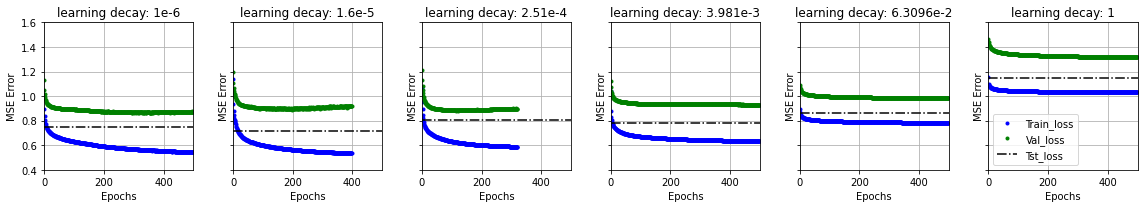

In [ ]:
learning_decay = np.logspace(-6,0,6)
learning_decay=np.around(learning_decay,decimals=6)
print("Learning decay: ", learning_decay)

# 6 neural networks with differents learning rates
h1, t1 = train_network_1_c_iii(learning_decay[0])
min_val_loss_1=np.min(h1.history["val_loss"])
h2, t2 = train_network_1_c_iii(learning_decay[1])
min_val_loss_2=np.min(h2.history["val_loss"])
h3, t3 = train_network_1_c_iii(learning_decay[2])
min_val_loss_3=np.min(h3.history["val_loss"])
h4, t4 = train_network_1_c_iii(learning_decay[3])
min_val_loss_4=np.min(h4.history["val_loss"])
h5, t5 = train_network_1_c_iii(learning_decay[4])
min_val_loss_5=np.min(h5.history["val_loss"])
h6, t6 = train_network_1_c_iii(learning_decay[5])
min_val_loss_6=np.min(h6.history["val_loss"])

print("Errores de validación: ", min_val_loss_1, min_val_loss_2, min_val_loss_3, min_val_loss_4, min_val_loss_5, min_val_loss_6)

titles=["learning decay: 1e-6","learning decay: 1.6e-5", "learning decay: 2.51e-4","learning decay: 3.981e-3", "learning decay: 6.3096e-2","learning decay: 1"]
graph_results([h1.history,h2.history,h3.history,h4.history,h5.history,h6.history],[t1,t2,t3,t4,t5,t6],titles)


**Respuesta**
En este caso, el learning decay que obtiene menor error 2.51e-4. El learning decay modifica el learning rate de la siguiente manera:

$lr = lr_{0} * \dfrac{1.}{1 + decay + iterations}$

**Comentarios**

En este caso, el learning decay que generó un menor error en el conjunto de entrenamiento fue el menor, y el mayor learning decay generó el mayor error en todos los conjuntos. 

Se puede ver que en el primer grafico hay overfitting debido al bajo error de entrenamiento y la curva ascendente del error de validación. Mientras que en el último gráfico se puede observar underfitting debido a lo alto que son los errores en todos los conjuntos.

De esto se puede concluir, que un learning decay bajo permite que el learning rate disminuya más lento, esto puede hacer que el efecto que tiene en la red sea casi nulo, resultando en sobreajuste. Por otro lado, un learning decay alto que hace que el learning rate disminuya más rápido, resultando en un pobre desempeño. Por lo que un valor entremedio ayuda a mejorar la generalización de la red neuronal.

##### IV) **Realice** un experimento similar, ahora variando el optimizador para la arquitectura e hiperparámetros dados, pruebe con los optimizadores [SGD, Adagrad, Adadelta, Adam y RMSprop]. Para esto **implemente una función** semejante a la utilizada en el punto anterior. **Pregunta:** ¿En qué optimizadores no tiene sentido utilizar el learning decay, por qué? **Visualizar y comentar**

In [ ]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

def train_network_1_c_iv(func):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=func(learning_rate=0.001),loss='mean_squared_error')
  # Define callbacks
  my_callbacks = [History(), 
      tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", # (No modificar patience!!!!!!!!!)
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

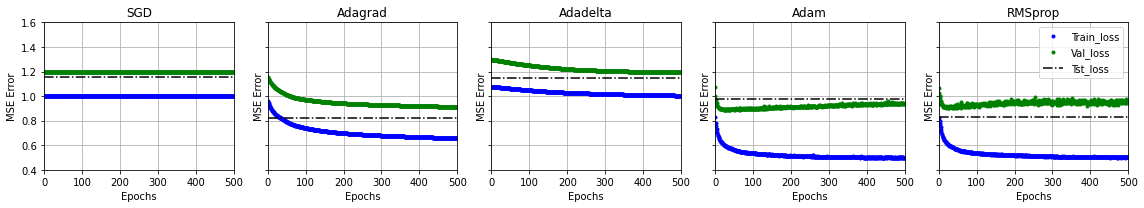

In [ ]:
# SGD
h1, t1 = train_network_1_c_iv(SGD)
# Adagrad
h2, t2 = train_network_1_c_iv(Adagrad)
# Adadelta
h3, t3 = train_network_1_c_iv(Adadelta)
# Adam
h4, t4 = train_network_1_c_iv(Adam)
# RMSprop
h5, t5 = train_network_1_c_iv(RMSprop)


titles=["SGD","Adagrad","Adadelta","Adam","RMSprop"]
graph_results([h1.history,h2.history,h3.history,h4.history,h5.history],[t1,t2,t3,t4,t5],titles)

**Respuesta**

En los optimizadores Adagrad, Adadelta y RMSprop, estos algoritmos automáticamente adaptan el learning rate a lo largo del curso de aprendizaje, por lo que no tiene sentido utilizar el learning decay ya que no mejora el resultado. Sin embargo, SGD tiene un learning rate fijo y es necesaria una función que cambie para converger.


**Comentario**

Se verificó utilizando un learning decay que SGD y Adam mejoraron con este cambio.

Visualizar y comenta

##### V) **Realice** un expermiento similar, ahora variando el batch_size entre 1 y x_tr.shape[0] incluyendo los extremos. Entrene 6 redes neuronales con la arquitectura e hiperparámetros dados. Para esto **implemente una función** semejante a la utilizada en el punto anterior. Para un batch_size=1 el entrenamiento se va a demorar más que en puntos anteriores, aprox. 1 segundo en _Colab_. **Visualizar y comentar**. **Preguntas:** ¿A qué es equivalente entrenar con un batch_size = 1 y batch_size=x_tr.shape[0]? ¿Cuál es el batch_size por default?

In [ ]:
def train_network_1_c_v(b_size):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
  # Define callbacks
  my_callbacks = [History(), 
      tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", # (No modificar patience!!!!!!!!!)
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, batch_size=b_size,validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

Errores de validación:  0.8871579766273499 0.8742135763168335 0.9015456438064575 0.8864642977714539 0.8945347666740417 0.9303619265556335


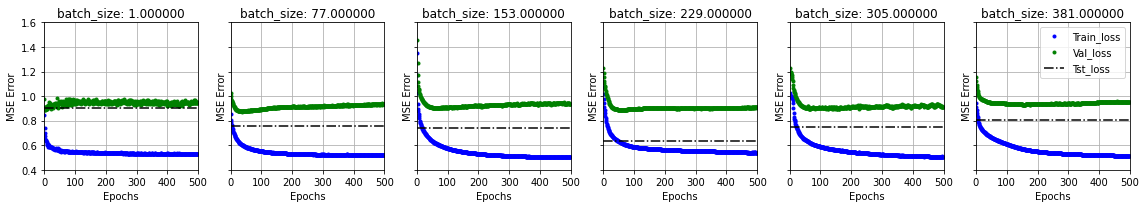

In [ ]:
n_batches=6
batches=np.round(np.linspace(1,x_tr.shape[0],n_batches))

# 6 neural networks with differents batch_size
h1, t1 = train_network_1_c_v(int(batches[0]))
min_val_loss_1=np.min(h1.history["val_loss"])
h2, t2 = train_network_1_c_v(int(batches[1]))
min_val_loss_2=np.min(h2.history["val_loss"])
h3, t3 = train_network_1_c_v(int(batches[2]))
min_val_loss_3=np.min(h3.history["val_loss"])
h4, t4 = train_network_1_c_v(int(batches[3]))
min_val_loss_4=np.min(h4.history["val_loss"])
h5, t5 = train_network_1_c_v(int(batches[4]))
min_val_loss_5=np.min(h5.history["val_loss"])
h6, t6 = train_network_1_c_v(int(batches[5]))
min_val_loss_6=np.min(h6.history["val_loss"])

print("Errores de validación: ", min_val_loss_1, min_val_loss_2, min_val_loss_3, min_val_loss_4, min_val_loss_5, min_val_loss_6)

titles=["batch_size: %f"%batches[0],"batch_size: %f"%batches[1], "batch_size: %f"%batches[2],"batch_size: %f"%batches[3],"batch_size: %f"%batches[4],"batch_size: %f"%batches[5]]
graph_results([h1.history,h2.history,h3.history,h4.history,h5.history,h6.history],[t1,t2,t3,t4,t5,t6],titles)

**Respuesta**

El *batch_size* es un hiperparámetro que define el número de muestras que se propagarán a través de la red antes de actualizar los parámetros internos del modelo. Existen diferencias en cuanto a la elección del tamaño de este hiperparámetro. Analizando nuestro caso encontramos que:

- Al utilizar un batch_size = 1, vamos a requerir mucho menos memoria, pero la estimación del gradiente será mucho menos precisa.
- Por otra parte al utilizar un batch _size = x_tr.shape[0] (es decir, un lote del tamaño del set de entrenamiento), vamos a requerir mucho más memoria, pero la estimación será más precisa.

Podemos apreciar estas tendencias en los gráficos de la pérdida de error.

**Comentarios**

Utilizar lote más pequeños nos permite entrenar redes de forma más rapida, ya que después de cada propagación se van actualizando los pesos. Si utilizamos todas las muestras en una sola propagación, sólo realizaremos una actualización de los pesos.



## 1.d Inicializaciones, pesos y gradientes

##### I) Utilizando las siguientes arquitecturas proceda a graficar la distribución de pesos de las distintas capas bajo inicialización uniforme (incluyendo bias). Adicionalmente calcule el gradiente de la función de pérdida (loss) para el conjunto de entrenamiento (promedio del gradiente del error de todos los datos de entrenamiento) respecto a los pesos en las distintas capas. **Visualize, compare y comente**

In [ ]:
# Define architecture (1)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
model1=models.Model(inputs=input_dense, outputs=output_dense)

# Define architecture (2)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
model2=models.Model(inputs=input_dense, outputs=output_dense)

# Get weights
weights1=model1.get_weights()
weights2=model2.get_weights()

# Get gradient model 1
with tf.GradientTape() as tape:
  y_pred1= model1(x_tr)
  loss1 = tf.reduce_mean(tf.square(y_pred1-y_tr)) #MSE loss
  grad1=tape.gradient(loss1,model1.trainable_weights)

# Get gradient model 2
with tf.GradientTape() as tape:
  y_pred2= model2(x_tr)
  loss2 = tf.reduce_mean(tf.square(y_pred2-y_tr)) #MSE loss
  grad2 = tape.gradient(loss2,model2.trainable_weights)

# gradient only calculated, if u want to apply it to update weights the model must have an optimizer, for example set model.optimizer=tf.keras.optimizers.Adam(lr) 
# and then use: model.optimizer.apply_gradients(zip(grad, model.trainable_variables)) to update weights. Equivalent to an epoch of maximum batch size (all training set) in this code
# model.compile and model.fit does this, with extra implementations, like variable batch size,
# so it's not necessary to do it manually in this case. If u pay attention to the code all the flow of information is in the form
# of tensors. This setup can be necessary in the case that u want to implement a custom loss that use exogenous variables to compute the loss, other than only y_pred and y_true
# for the best of my knowledge u can define a custom loss to use in model.compile and model.fit, but only if u are using this two variables (y_true,y_pred),
# exogenous variables are not supported

# As example, if u want to define a mean quintic error loss, only using y_pred and y_true and want to keep all the cool functionalities, as callbacks, from model.compile
# and model.fit:
# def custom_loss(y_true,y_pred):
#   return(tf.reduce_mean(tf.math.pow(y_true-y_pred,5)))
# model.compile (optimizer='rmsprop',loss="custom_loss")
# model.fit(x_tr, y_tr, epochs=500, verbose=0, batch_size=?,validation_data=(x_val, y_val),callbacks=my_callbacks)

In [ ]:
# To understand where are the weights and number of weights:
model1.summary()

Model: "functional_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_91 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_92 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_93 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_94 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 101       
Total params: 31,301
Trainable params: 31,301
Non-trainable params: 0
_________________________________________________

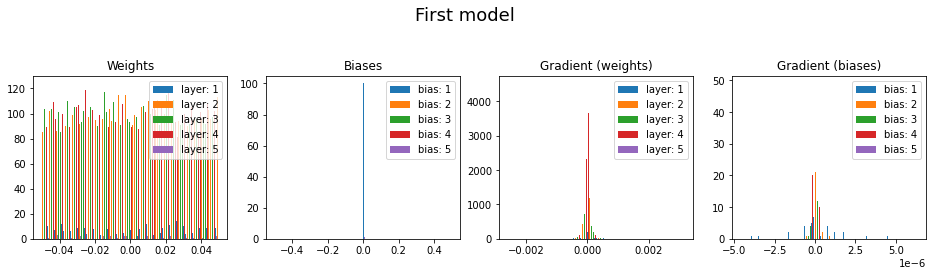

In [ ]:
# First model
plt.suptitle('First model',size=18,y=1.2)
plt.rcParams["figure.figsize"]=[20,3]
# Weights
plt.subplot(1,4,1)
plt.title("Weights")
plt.hist(weights1[::2],bins=100,label=["layer: 1","layer: 2","layer: 3","layer: 4","layer: 5"])
plt.legend()
# Biases
plt.subplot(1,4,2)
plt.title("Biases")
plt.hist(weights1[1::2],bins=100,label=["bias: 1","bias: 2","bias: 3","bias: 4","bias: 5"])
plt.legend()
# Gradient (weights)
plt.subplot(1,4,3)
plt.title("Gradient (weights)")
plt.hist(grad1[::2],bins=100, label=["layer: 1","layer: 2","layer: 3","layer: 4","layer: 5"])
plt.legend()
# Gradient (biases)
plt.subplot(1,4,4)
plt.title("Gradient (biases)")
plt.hist(grad1[1::2],bins=100,label=["bias: 1","bias: 2","bias: 3","bias: 4","bias: 5"])
plt.legend()
plt.show()

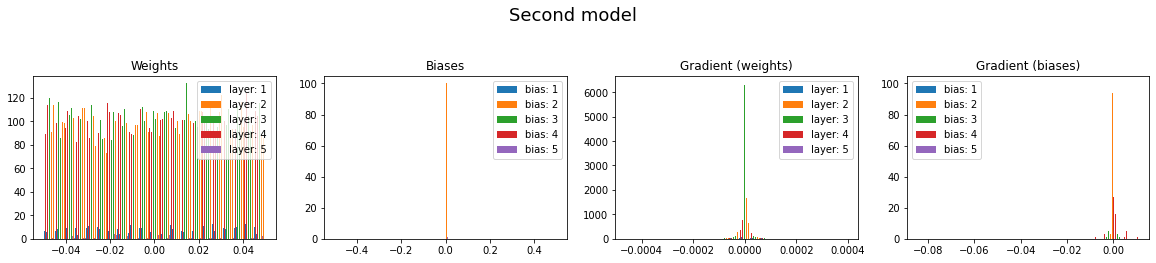

In [ ]:
# Second model
plt.suptitle('Second model',size=18,y=1.2)
plt.rcParams["figure.figsize"]=[20,3]
# Weights
plt.subplot(1,4,1)
plt.title("Weights")
plt.hist(weights2[::2],bins=100, label=["layer: 1","layer: 2","layer: 3","layer: 4","layer: 5"])
plt.legend()
# Biases
plt.subplot(1,4,2)
plt.title("Biases")
plt.hist(weights2[1::2],bins=100,label=["bias: 1","bias: 2","bias: 3","bias: 4","bias: 5"])
plt.legend()
# Gradiant (training weights)
plt.subplot(1,4,3)
plt.title("Gradient (weights)")
plt.hist(grad2[::2],bins=100, label=["layer: 1","layer: 2","layer: 3","layer: 4","layer: 5"])
plt.legend()
# Gradiant (training biases)
plt.subplot(1,4,4)
plt.title("Gradient (biases)")
plt.hist(grad2[1::2],bins=100,label=["bias: 1","bias: 2","bias: 3","bias: 4","bias: 5"])
plt.legend()
plt.show()


**Respuesta**

El gradiente de la función de pérdida (loss) para el conjunto de entrenamiento tiene promedio 0, esto se ve en el gráfico que se comporta como una distribución normal. 

**Comparación** 

En el primer modelo, los pesos en general son menos a los del segundo modelo. Mientras que el bias en ambos es 0.

El gradiente de los pesos del primer modelo tiene una campana más alta y delgada que el segundo, sin embargo, su rango es menor. Por otra parte el bias del primero tiene más valores que los que se ven en el segundo modelo, y su rango es mayor.

**Comentarios**

En los 2 primeros gráficos se nota la distribución uniforme que sigue, mientras que en los últimos dos, sigue una distribución normal.

La varianza del gradiente del segundo modelo es menor que el del primer modelo, esto se aprecia por la forma pronunciada del 2do modelo, mientras que el 1er modelo tiene una campana más achatada.

Por otra parte, en el segundo modelo se ve que no tiene tantos valores de biases. Esto puede deberse al trade-off que hay entre el sesgo y el bias. 



##### II) Repita el experimento para las inicializaciones de kernel HE_uniform, Glorot normal y Glorot uniform. **Visualice, comente, y compare** 

**Pregunta** ¿Es posible inicializar los bias? ¿Cómo sería el código?

In [ ]:
kernel_initializer=['he_uniform','glorot_normal','glorot_uniform']
def arch1(kernel_initializer):
  input_dense= input_layer.Input(shape=(8))
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=kernel_initializer)(input_dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=kernel_initializer)(dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=kernel_initializer)(dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=kernel_initializer)(dense)
  output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer=kernel_initializer)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  return model

def arch2(kernel_initializer):
  input_dense= input_layer.Input(shape=(8))
  dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer=kernel_initializer)(input_dense)
  dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer=kernel_initializer)(dense)
  dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer=kernel_initializer)(dense)
  dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer=kernel_initializer)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer=kernel_initializer)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  return model

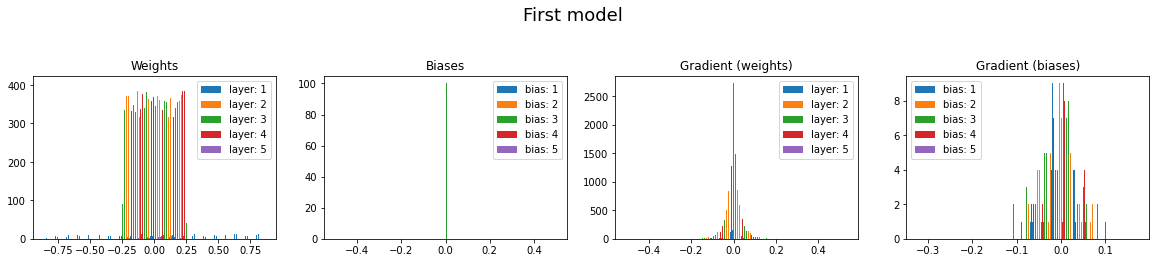

Kernel Initializer: he_uniform


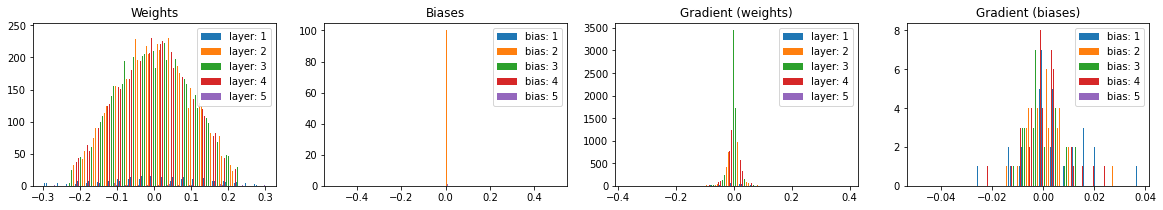

Kernel Initializer: glorot_normal


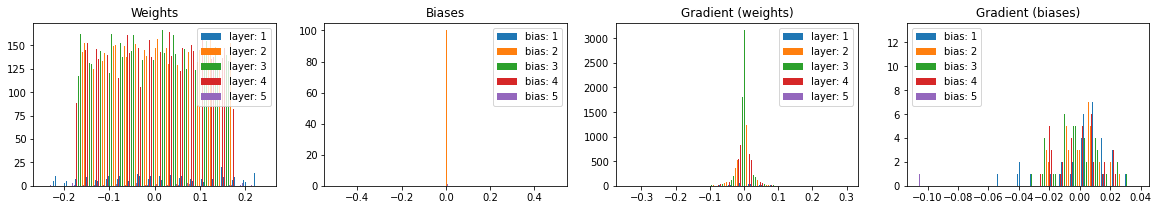

Kernel Initializer: glorot_uniform


In [ ]:
plt.suptitle('First model',size=18,y=1.2)
plt.rcParams["figure.figsize"]=[20,3]

for i in range(3):
  
  model = arch1(kernel_initializer[i])
  # Get weights
  weights=model.get_weights()

  # Get gradient model 1
  with tf.GradientTape() as tape:
    y_pred= model(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
    grad=tape.gradient(loss,model.trainable_weights)

  # Weights
  plt.subplot(1,4,1)
  plt.title("Weights")
  plt.hist(weights[::2],bins=100, label=["layer: 1","layer: 2","layer: 3","layer: 4","layer: 5"])
  plt.legend()
  # Biases
  plt.subplot(1,4,2)
  plt.title("Biases")
  plt.hist(weights[1::2],bins=100,label=["bias: 1","bias: 2","bias: 3","bias: 4","bias: 5"])
  plt.legend()
  # Gradiant (training weights)
  plt.subplot(1,4,3)
  plt.title("Gradient (weights)")
  plt.hist(grad[::2],bins=100, label=["layer: 1","layer: 2","layer: 3","layer: 4","layer: 5"])
  plt.legend()
  # Gradiant (training biases)
  plt.subplot(1,4,4)
  plt.title("Gradient (biases)")
  plt.hist(grad[1::2],bins=100,label=["bias: 1","bias: 2","bias: 3","bias: 4","bias: 5"])
  plt.legend()
  plt.show()
  print('Kernel Initializer: %s'%(kernel_initializer[i]))

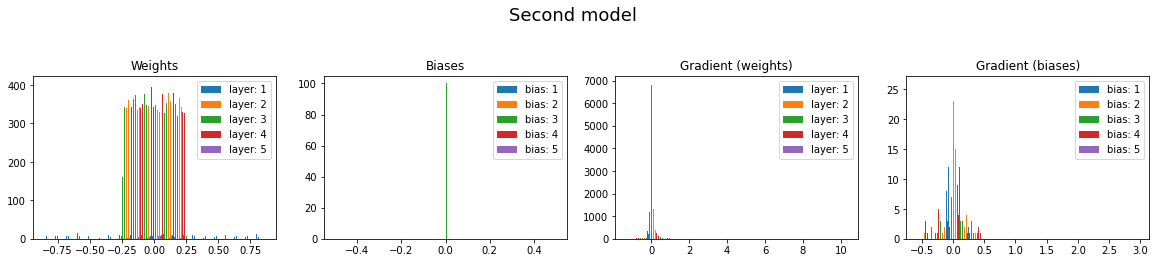

Kernel Initializer: he_uniform


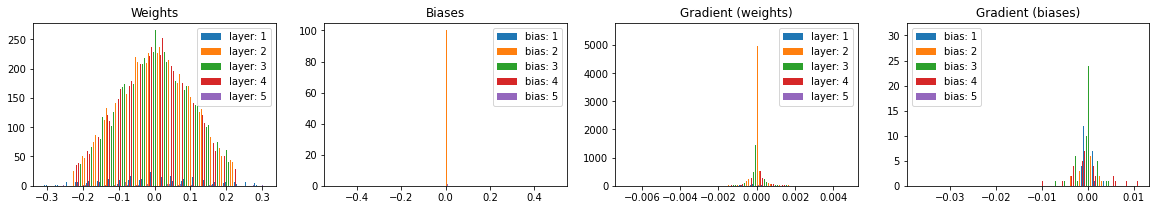

Kernel Initializer: glorot_normal


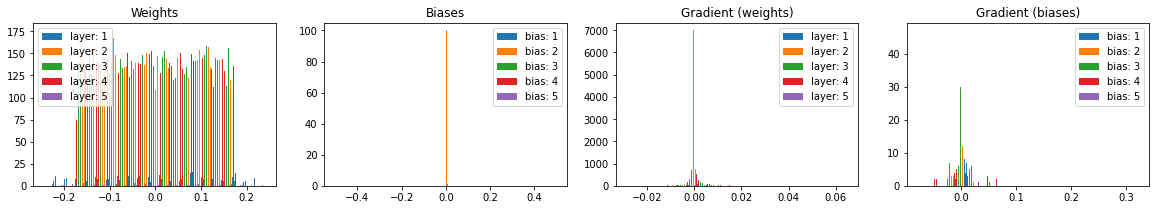

Kernel Initializer: glorot_uniform


In [ ]:
plt.rcParams["figure.figsize"]=[20,3]
plt.suptitle('Second model',size=18,y=1.2)

for i in range(3):
  model = arch2(kernel_initializer[i])
  # Get weights
  weights=model.get_weights()

  # Get gradient model 1
  with tf.GradientTape() as tape:
    y_pred= model(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
    grad=tape.gradient(loss,model.trainable_weights)
  
  # Weights
  plt.subplot(1,4,1)
  plt.title("Weights")
  plt.hist(weights[::2],bins=100, label=["layer: 1","layer: 2","layer: 3","layer: 4","layer: 5"])
  plt.legend()
  # Biases
  plt.subplot(1,4,2)
  plt.title("Biases")
  plt.hist(weights[1::2],bins=100,label=["bias: 1","bias: 2","bias: 3","bias: 4","bias: 5"])
  plt.legend()
  # Gradiant (training weights)
  plt.subplot(1,4,3)
  plt.title("Gradient (weights)")
  plt.hist(grad[::2],bins=100, label=["layer: 1","layer: 2","layer: 3","layer: 4","layer: 5"])
  plt.legend()
  # Gradiant (training biases)
  plt.subplot(1,4,4)
  plt.title("Gradient (biases)")
  plt.hist(grad[1::2],bins=100,label=["bias: 1","bias: 2","bias: 3","bias: 4","bias: 5"])
  plt.legend()
  plt.show()
  print('Kernel Initializer: %s'%(kernel_initializer[i]))

**Comparación**

Cuando se utiliza una función de activación tangente hiperbólica, se tiene buenos resultados con ambos glorot, ya que el gradiente no es tan pequeño, se ve que en ambos casos va de [-0.1, 0.1], mientras que con he_uniform es app. [-0.05, 0.05].

Por otro lado, ReLu tiene gradiente muy pequeño con glorot_uniform y se desvanece con glorot_normal. Sin embargo, con he_uniform tiene un gradiente de app. [-1, 1], esto quiere decir que está muy lejos de desvanecerse.


**Comentarios**

La forma de los pesos sigue la distribución de probabilidades de la inicialización independiente del tipo (he o glorot).

Las mejores combinaciones son: 
* He + ReLu
* Glorot + tanh



**Respuestas**

Si es posible inicializar el bias, se debe agregar *bias_initializer* a la función Dense, el "zeros" por default, pero puede ser "ones", "glorot_normal", entre otros.

El codigo para una capa escondida sería:



```
dense = layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="glorot_normal", bias_initializer='ones')(dense)

```




##### III) Utilizando las arquitecturas siguientes. **Recolecte** los pesos y gradientes al inicializar, **entrene** la red neuronal, y **recolecte** nuevamente los pesos y gradientes, junto a los errores de entrenamiento, validación y test. (En la medida de lo posible!). **Visualice, compare y comente**. Ciertos conceptos ya debiesen salir a colación para explicar lo que está sucediendo.

In [ ]:
# 1st arch
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='linear',use_bias=True, kernel_initializer="uniform")(dense)
model1=models.Model(inputs=input_dense, outputs=output_dense)

# 2nd arch
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(1000, activation='sigmoid',use_bias=False, kernel_initializer="he_uniform")(input_dense)
output_dense=layers.Dense(1, activation='linear',use_bias=False, kernel_initializer="uniform")(dense)
model2=models.Model(inputs=input_dense, outputs=output_dense)

# Get initial weights
weights_ini1=model1.get_weights()
weights_ini2=model2.get_weights()

# Get initial gradient
with tf.GradientTape() as tape:
  y_pred1= model1(x_tr)
  loss1 = tf.reduce_mean(tf.square(y_pred1-y_tr)) #MSE loss
  grad_ini1=tape.gradient(loss1,model1.trainable_weights)
with tf.GradientTape() as tape:
  y_pred2= model2(x_tr)
  loss2 = tf.reduce_mean(tf.square(y_pred2-y_tr)) #MSE loss
  grad_ini2=tape.gradient(loss2,model2.trainable_weights)

# Compile model
model1.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
model2.compile(optimizer=SGD(learning_rate=0.00001),loss='mean_squared_error')

# Train model
hist1 = model1.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]) #only history as callback
hist2 = model2.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()]) #only history as callback
  
# Get final weights
weights_fin1=model1.get_weights()
weights_fin2=model2.get_weights()

# Get final gradient
with tf.GradientTape() as tape:
  y_pred1= model1(x_tr)
  loss1 = tf.reduce_mean(tf.square(y_pred1-y_tr)) #MSE loss
  grad_fin1=tape.gradient(loss1,model1.trainable_weights)
with tf.GradientTape() as tape:
  y_pred2= model2(x_tr)
  loss2 = tf.reduce_mean(tf.square(y_pred2-y_tr)) #MSE loss
  grad_fin2=tape.gradient(loss2,model2.trainable_weights)

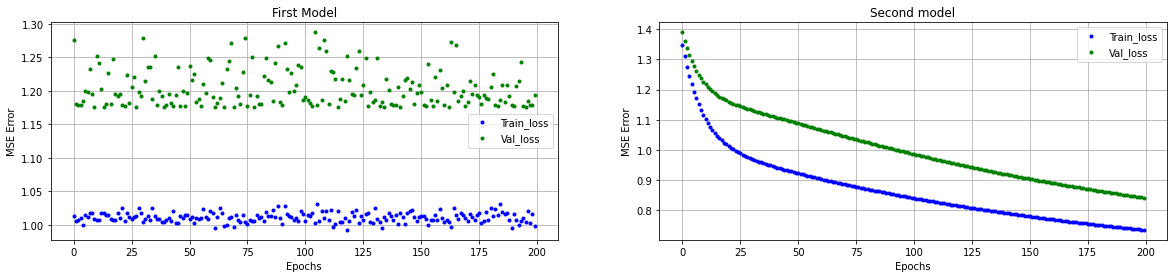

[1.348734974861145, 1.3101242780685425, 1.2756662368774414, 1.2451304197311401, 1.2174978256225586, 1.1927385330200195, 1.1706087589263916, 1.1508104801177979, 1.1327807903289795, 1.116677165031433, 1.1021207571029663, 1.0889904499053955, 1.077040195465088, 1.0661578178405762, 1.056325078010559, 1.0473634004592896, 1.0390944480895996, 1.0316588878631592, 1.0246824026107788, 1.018188238143921, 1.0123436450958252, 1.0067813396453857, 1.001799464225769, 0.9969951510429382, 0.9925325512886047, 0.9883788824081421, 0.9844556450843811, 0.9806464314460754, 0.9770559072494507, 0.973669171333313, 0.9704862833023071, 0.9673668742179871, 0.9643857479095459, 0.9615551233291626, 0.958911657333374, 0.9561580419540405, 0.953652024269104, 0.9511690139770508, 0.9486720561981201, 0.9463542103767395, 0.9440016746520996, 0.9416893124580383, 0.9394350051879883, 0.9371980428695679, 0.935027539730072, 0.9329522252082825, 0.930850625038147, 0.9288241267204285, 0.9267053604125977, 0.9248058199882507, 0.92272853

In [ ]:
plt.rcParams["figure.figsize"]=[20,4]

# First model
plt.subplot(1,2,1)
plt.title("First Model")
plt.plot(hist1.history["loss"],"b.",label="Train_loss")
plt.plot(hist1.history["val_loss"],"g.",label="Val_loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()

# Second model
plt.subplot(1,2,2)
plt.title("Second model")
plt.plot(hist2.history["loss"],"b.",label="Train_loss")
plt.plot(hist2.history["val_loss"],"g.",label="Val_loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()
plt.show()

print(hist2.history["loss"])


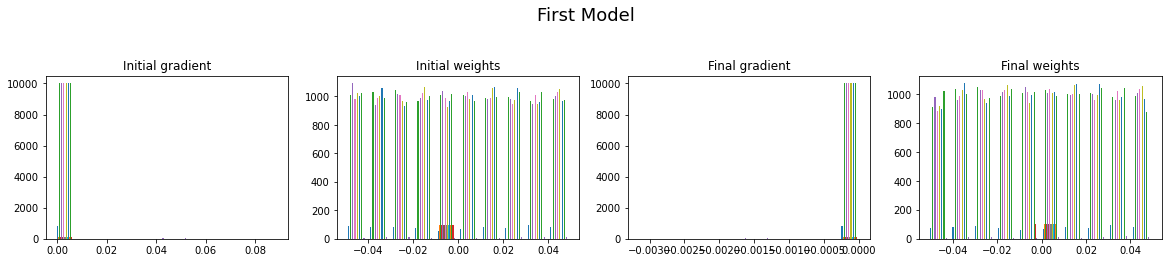

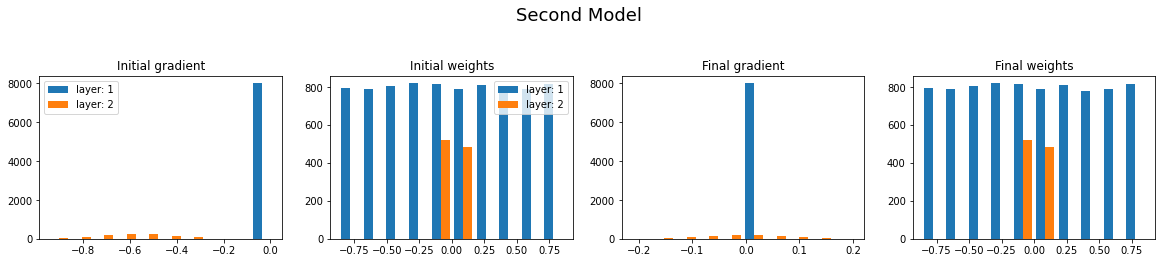

In [ ]:
plt.rcParams["figure.figsize"]=[20,3]

plt.suptitle('First Model',size=18,y=1.2)
# Grandient
plt.subplot(1,4,1)
plt.title("Initial gradient")
plt.hist(grad_ini1)
plt.subplot(1,4,3)
plt.title("Final gradient")
plt.hist(grad_fin1)

# Weights
plt.subplot(1,4,2)
plt.title("Initial weights")
plt.hist(weights_ini1)
plt.subplot(1,4,4)
plt.title("Final weights")
plt.hist(weights_fin1)
plt.show()


plt.suptitle('Second Model',size=18,y=1.2)
# Grandient
plt.subplot(1,4,1)
plt.title("Initial gradient")
plt.hist(grad_ini2, label=["layer: 1","layer: 2"])
plt.legend()
plt.subplot(1,4,3)
plt.title("Final gradient")
plt.hist(grad_fin2)

# Weights
plt.subplot(1,4,2)
plt.title("Initial weights")
plt.hist(weights_ini2,label=["layer: 1","layer: 2"])
plt.legend()
plt.subplot(1,4,4)
plt.title("Final weights")
plt.hist(weights_fin2)
plt.show()

 **Comparación**

En este ejercicio, se está comparando una red neuronal Shallow con una Deep. El error de validación y entrenamiento explotan en el caso de Shallow, por esto el gradiente y los pesos también se indefinen. En el caso de Deep, el error de validación está disperso, aunque si se aumentan los epochs es posible verlo como una línea.

En el primer modelo, se ve que los pesos iniciales tienen una distribución uniforme, y luego del entrenamiento, los pesos en los extremos disminuye. Mientras que el gradiente después del entrenamiento se hace más pequeño.

Los pesos entre del primer modelo tienen un rango menor ([-0.05, 0.05]) que el segundo modelo ([-1, 1]), esto se debe a la cantidad de pesos que tiene el primer modelo, si bien tiene menos neuronas, al estar dividida en capas tiene una cantidad mayor de pesos. 

 **Comentarios**

El segundo modelo diverge, teniendo un resultado indefinido por lo que no se pudo graficar. La razón que se identifico fue el gran learning rate que se utiliza, cuando se ocupo un learning rate menor, la red neuronal logró converger como se muestra. 

Se mantuvo el learning rate pequeño para mostrar resultados, sin embargo, si ambos son entrenados bajo las mismas condiciones, no se puede graficar el resultado del segundo modelo.

El cambio en el peso y gradientes en el primer modelo es una consecuencia del entrenamiento, ya que los pesos inicialmente se definen aleatoriamente. Luego, en el entrenamiento se van ajustando de tal manera de representar mejor la data.

## 1.e Regularización

##### i) Utilizando la siguiente arquitectura experimente con regularización l1 y l2 usando distintos valores de $\lambda$ para las distintas capas, pero manteniendo el mismo tipo de regularización en ambas capas (l1 ó l2). **Entrene** 4 redes neuronales para cada norma con distintos valores de $\lambda$ en cada capa (8 redes en total). Utilice las variaciones de $\lambda$ que desee, puede usar las indicadas si desea. **Visualice y comente** los errores de entrenamiento, validación **y la resta de ambos errores** (e.d error_tr-error_val). 

**Pregunta:** ¿Cómo se comportarán los pesos de la red neuronal para la norma l1 y para la norma l2 en función de $\lambda$? **Apoyarse en visualización de los pesos al final del entrenamiento para responder la pregunta.**

In [ ]:
from keras.regularizers import l1,l2
# Variaciones de lambda: 
# En las dos capas y para cada norma probar las 4 combinaciones:
lambda_1st=[0,0.1]
lambda_2nd=[0,0.1]

In [ ]:
def train_network_1_e_i(norma, lambda1, lambda2):
  
  # Define architecture
  input_dense = input_layer.Input(shape=(8))
  dense = layers.Dense(500, activation='relu',activity_regularizer=norma(lambda1),use_bias=True, kernel_initializer="glorot_normal")(input_dense)
  dense = layers.Dense(500, activation='relu',activity_regularizer=norma(lambda2),use_bias=True, kernel_initializer="glorot_normal")(dense)
  output_dense = layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
  model = models.Model(inputs=input_dense, outputs=output_dense)

  # Compile model
  model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')

  # Train model
  hist = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

  return model, hist


In [ ]:
# Entrenamos 4 redes neuronales para l1
model_l1_1, hist_l1_1 = train_network_1_e_i(l1,lambda_1st[0], lambda_2nd[0])
model_l1_2, hist_l1_2 = train_network_1_e_i(l1,lambda_1st[1], lambda_2nd[1])
model_l1_3, hist_l1_3 = train_network_1_e_i(l1,lambda_1st[1], lambda_2nd[0])
model_l1_4, hist_l1_4 = train_network_1_e_i(l1,lambda_1st[0], lambda_2nd[1])

# Entrenamos 4 redes neuronales para l2
model_l2_1, hist_l2_1 = train_network_1_e_i(l2,lambda_1st[0], lambda_2nd[0])
model_l2_2, hist_l2_2 = train_network_1_e_i(l2,lambda_1st[1], lambda_2nd[1])
model_l2_3, hist_l2_3 = train_network_1_e_i(l2,lambda_1st[1], lambda_2nd[0])
model_l2_4, hist_l2_4 = train_network_1_e_i(l2,lambda_1st[0], lambda_2nd[1])

In [ ]:
def plot_regularization(hist, plot_name):
  plt.rcParams["figure.figsize"]=[20,4]
  plt.suptitle('Model :'+plot_name,size=18,y=1.0)

  plt.subplot(1,2,1)
  plt.title("Model Loss")
  plt.plot(hist.history["loss"],"r", label="Train Loss")
  plt.plot(hist.history["val_loss"],"b", label="Val Loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()

  plt.subplot(1,2,2)
  plt.title("Train Loss - Var Loss")
  plt.plot(np.asarray(hist.history["loss"])-np.asarray(hist.history["val_loss"]),"g", label="Train Loss - Val Loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()

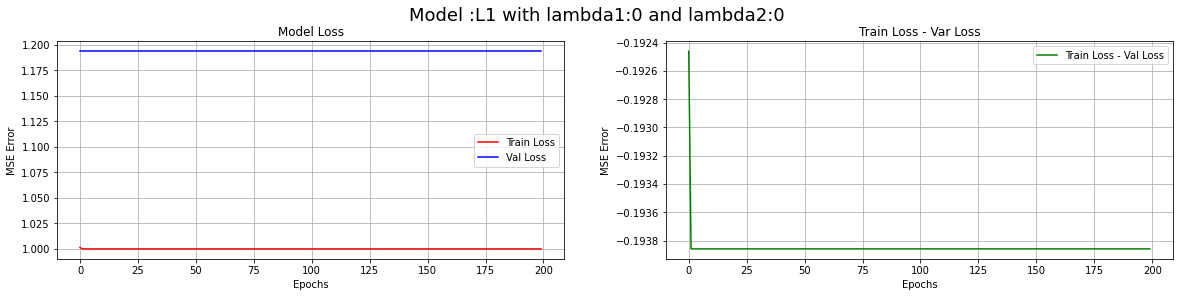

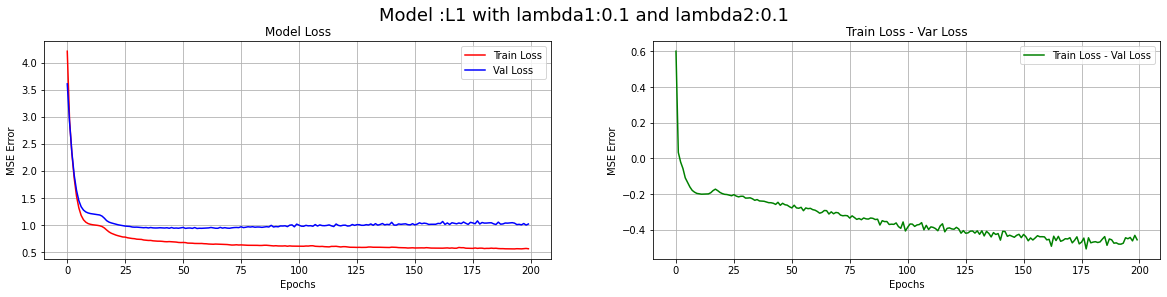

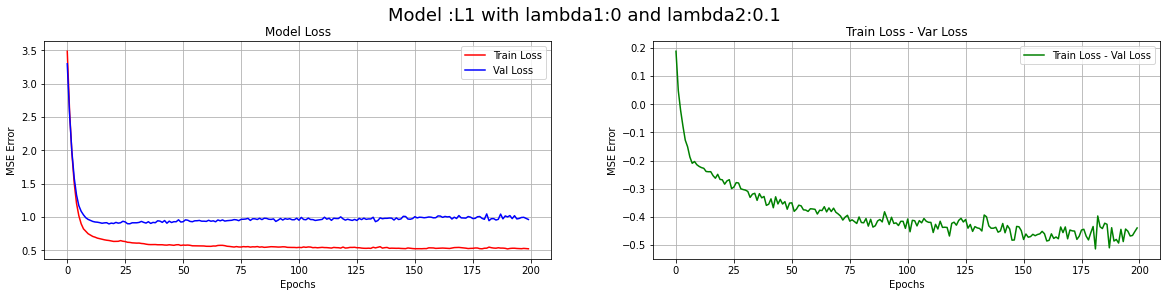

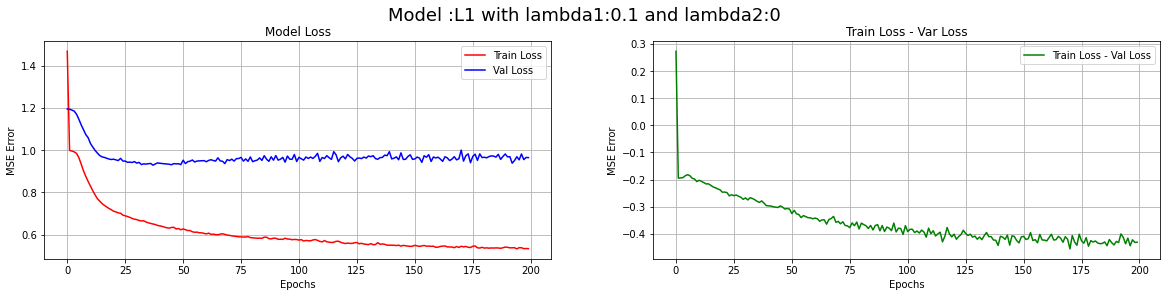

In [ ]:
plot_regularization(hist_l1_1, 'L1 with lambda1:0 and lambda2:0')
plot_regularization(hist_l1_2, 'L1 with lambda1:0.1 and lambda2:0.1')
plot_regularization(hist_l1_3, 'L1 with lambda1:0 and lambda2:0.1')
plot_regularization(hist_l1_4, 'L1 with lambda1:0.1 and lambda2:0')

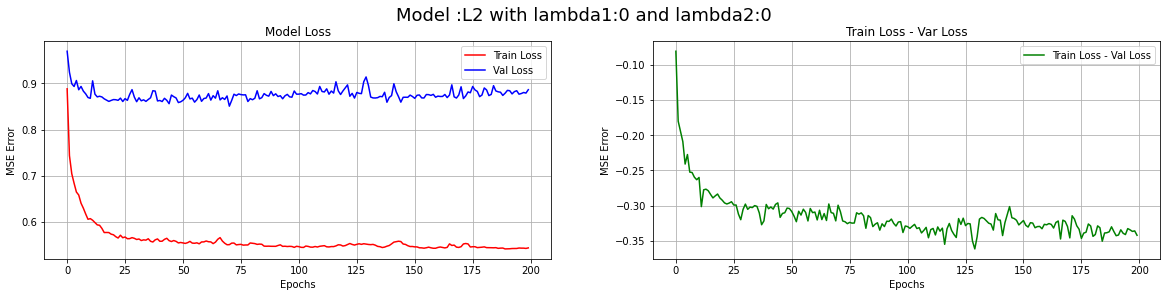

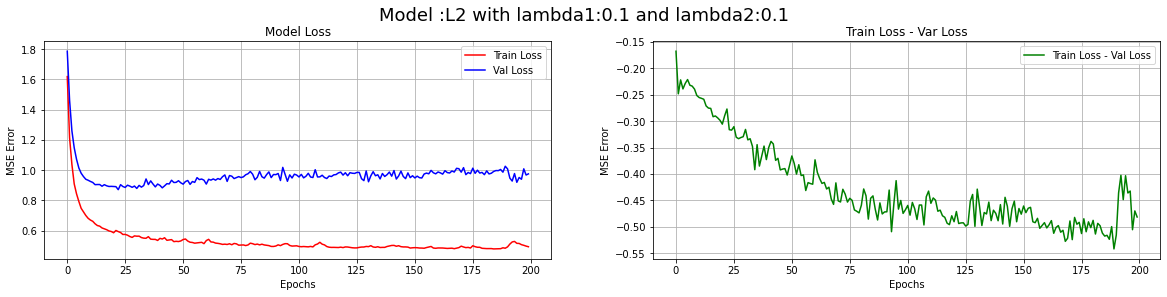

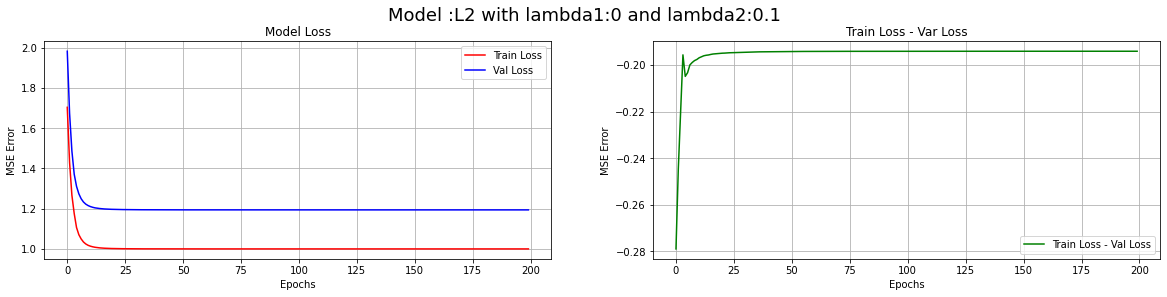

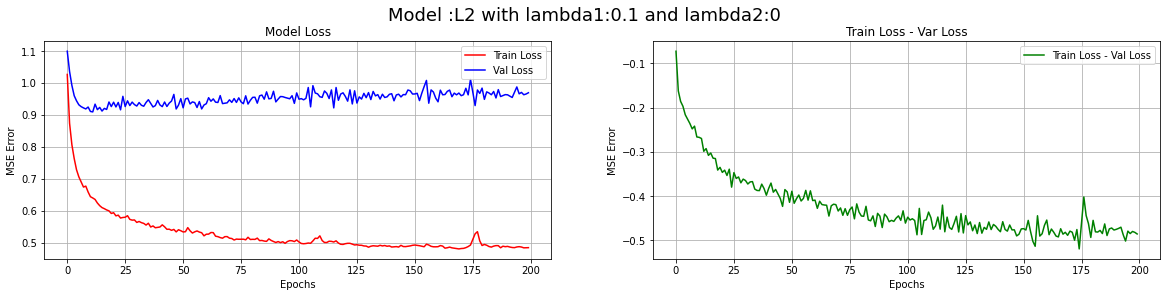

In [ ]:
plot_regularization(hist_l2_1, 'L2 with lambda1:0 and lambda2:0')
plot_regularization(hist_l2_2, 'L2 with lambda1:0.1 and lambda2:0.1')
plot_regularization(hist_l2_3, 'L2 with lambda1:0 and lambda2:0.1')
plot_regularization(hist_l2_4, 'L2 with lambda1:0.1 and lambda2:0')

In [ ]:
# Get final weights
weights_fin_l1 = [model_l1_1.get_weights(), model_l1_2.get_weights(), model_l1_3.get_weights(), model_l1_4.get_weights()]
weights_fin_l2 = [model_l2_1.get_weights(), model_l2_2.get_weights(), model_l2_3.get_weights(), model_l2_4.get_weights()]

In [ ]:
def plot_regularization_weight(weights, plot_name):

  plt.rcParams["figure.figsize"]=[20,4]
  plt.suptitle('Model :'+plot_name,size=18,y=1.0)

  plt.subplot(1,4,1)
  plt.title("Lambda1:0 Lambda2:0")
  plt.hist(weights[0])

  plt.subplot(1,4,2)
  plt.title("Lambda1:0.1 Lambda2:0.1")
  plt.hist(weights[1])

  plt.subplot(1,4,3)
  plt.title("Lambda1:0 Lambda2:0.1")
  plt.hist(weights[2])

  plt.subplot(1,4,4)
  plt.title("Lambda1:0.1 Lambda2:0")
  plt.hist(weights[3])

  plt.show()

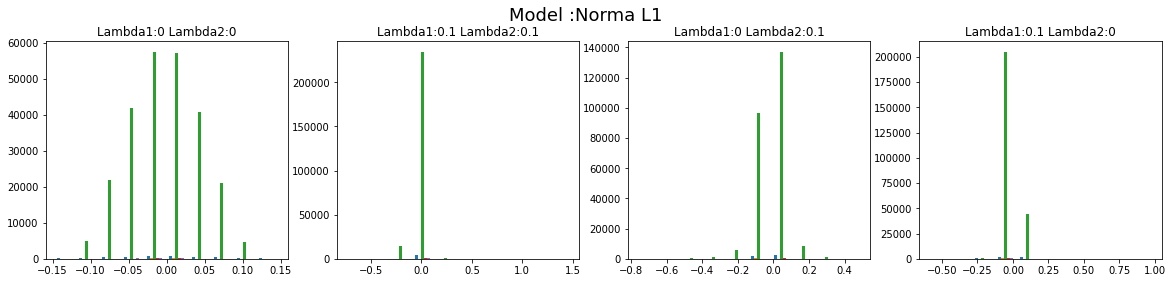

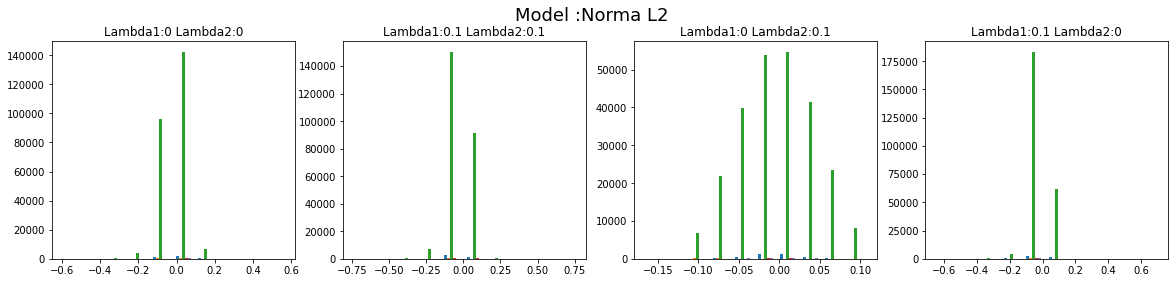

In [ ]:
plot_regularization_weight(weights_fin_l1, 'Norma L1')
plot_regularization_weight(weights_fin_l2, 'Norma L2')

**Comparación**

Para la norma l1:
- Muchos mas pesos que en l2
- Para valores lambda = 0 podemos ver una distribución normal de los pesos, mientras que si aumentamos este valor en ambas capas tenemos una distribución mas compacta y sesgada ligeramente a la derecha.
- Si a la primera capa otorgamos lambda = 0 y a la segunda lambda = 0.1 podemos ver una ligera tendencia a normalizarse, más no lo es.
- Por el contrario, vemos una distribución más compacta con un ligero sesgo a la derecha.

Para la norma l2:
- Menos pesos que en l1
- Para valores lambda = 0 podemos ver uan concentración de los pesos al medio de la gráfica, mientras que si aumentamos este valor en ambas capas tenemos una distribución centrada mas compacta.
- Si a la primera capa otorgamos lambda = 0 y a la segunda lambda = 0.1 podemos ver una distribución relativamente normalizada.
- Por el contrario, vemos una distribución más compacta con un ligero sesgo a la derecha (similar a lo que ocurre en l1)

**Comentarios**

En la regularización l1 se utiliza el concepto de penalización, donde el valor se añade al valor abosluto de la suma de los parámetros. Esta penalización empuja el valor de los parámetros hacia valores más pequeños. Hay una mejor generalización, pero solo hasta cierto punto.

La idea detrás de l2 es reducir el valor de los parámetros para que sean pequeños, donde el valor de lambda lo que hace es aumentar la regularización. Aquí también se introduce el concepto de penalización, pero con el valor absoluto, sino que su valor se añade a la suma de los cuadrados de los parámetros, por tanto la penalización es mayor.


##### II) Experimentaremos con el método dropout. Probaremos con distintos valores de Dropout para ambas capas de la arquitectura presentada, de manera similar al punto anterior. Entrene 9 redes neuronales utilizando las combinaciones indicadas. **Visualizar, comparar y comentar** utilizando los errores de entrenamiento, validación y la resta entre ambos valores.

**Preguntas:** ¿Qué es/hace dropout? ¿Por qué es considerado un método de regularización?

In [ ]:
dropout_1st_layer=[0,0.3,0.6]
dropout_2nd_layer=[0,0.3,0.6]

In [ ]:
def train_network_1_e_ii(dropout1, dropout2):

  # Define architecture
  input_dense = input_layer.Input(shape=(8))
  dense = layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
  dense = layers.Dropout(dropout1)(dense)
  dense = layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
  dense = layers.Dropout(dropout2)(dense)
  output_dense = layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
  model = models.Model(inputs=input_dense, outputs=output_dense)

  # Compile model
  model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

  # Train model
  hist = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

  return hist


In [ ]:
# Entrenamos las redes
hist_1_e_ii_1 = train_network_1_e_ii(dropout_1st_layer[0],dropout_2nd_layer[0])
hist_1_e_ii_2 = train_network_1_e_ii(dropout_1st_layer[1],dropout_2nd_layer[0])
hist_1_e_ii_3 = train_network_1_e_ii(dropout_1st_layer[2],dropout_2nd_layer[0])
hist_1_e_ii_4 = train_network_1_e_ii(dropout_1st_layer[0],dropout_2nd_layer[1])
hist_1_e_ii_5 = train_network_1_e_ii(dropout_1st_layer[1],dropout_2nd_layer[1])
hist_1_e_ii_6 = train_network_1_e_ii(dropout_1st_layer[2],dropout_2nd_layer[1])
hist_1_e_ii_7 = train_network_1_e_ii(dropout_1st_layer[0],dropout_2nd_layer[2])
hist_1_e_ii_8 = train_network_1_e_ii(dropout_1st_layer[1],dropout_2nd_layer[2])
hist_1_e_ii_9 = train_network_1_e_ii(dropout_1st_layer[2],dropout_2nd_layer[2])

In [ ]:
def plot_regularization(hist, plot_name):
  plt.rcParams["figure.figsize"]=[20,4]
  plt.suptitle('Model :'+plot_name,size=18,y=1.0)

  plt.subplot(1,2,1)
  plt.title("Model Loss")
  plt.plot(hist.history["loss"],"r", label="Train Loss")
  plt.plot(hist.history["val_loss"],"b", label="Val Loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()

  plt.subplot(1,2,2)
  plt.title("Train Loss - Var Loss")
  plt.plot(np.asarray(hist.history["loss"])-np.asarray(hist.history["val_loss"]),"g", label="Train Loss - Val Loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()

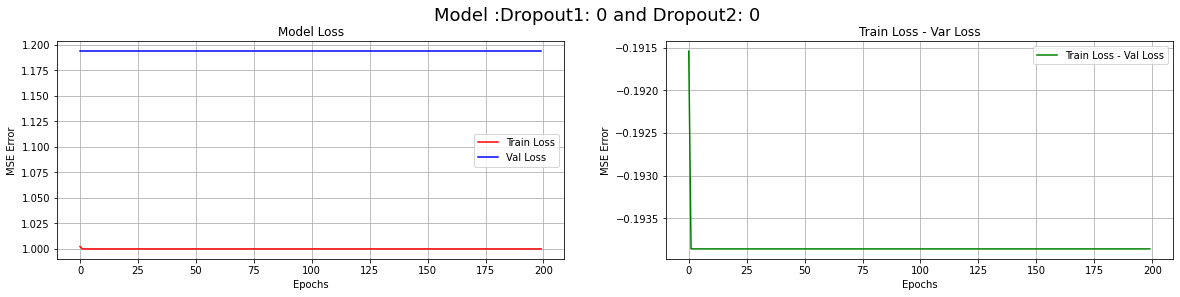

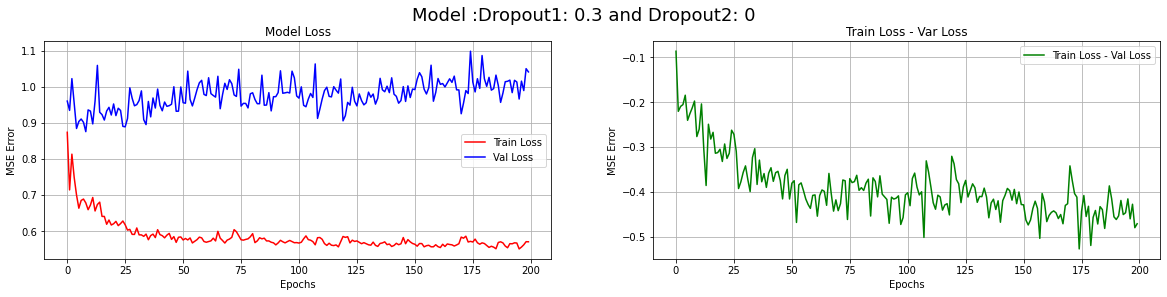

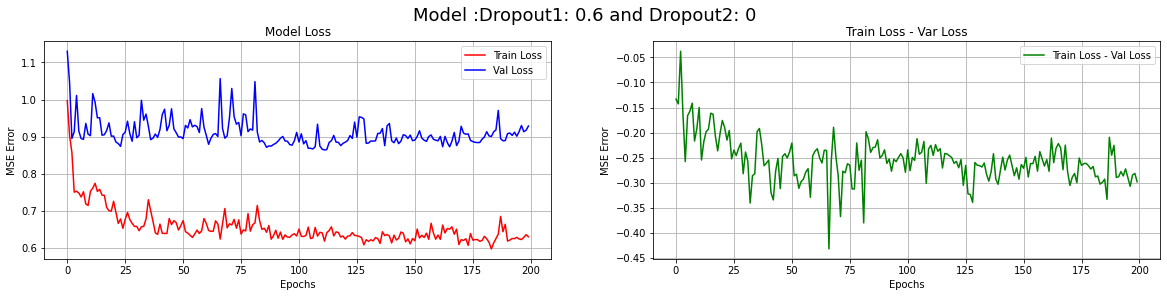

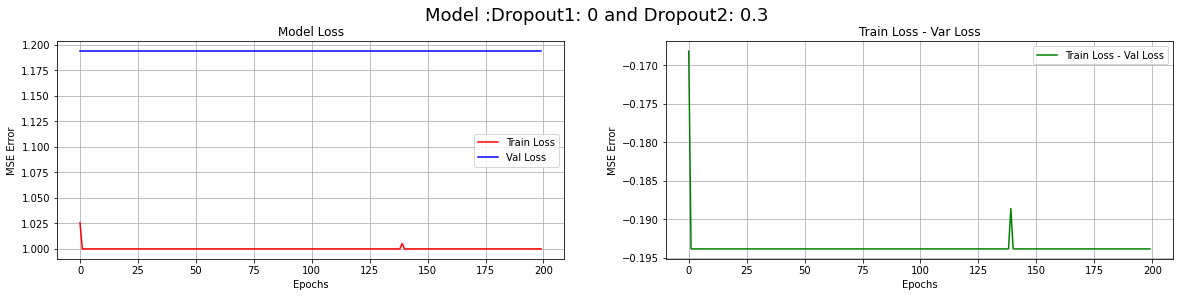

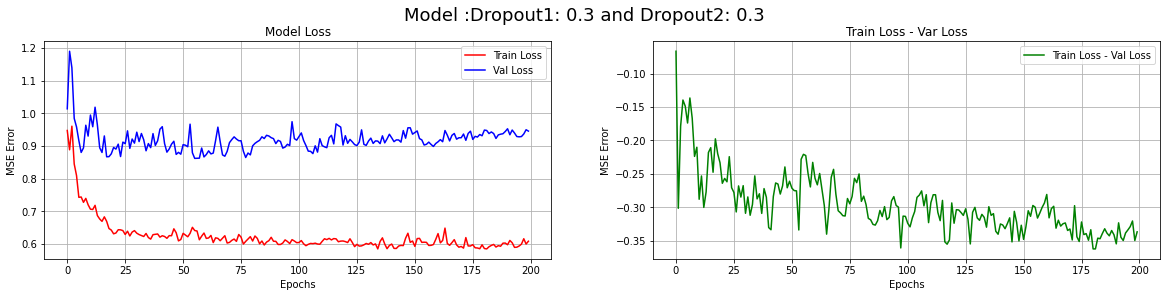

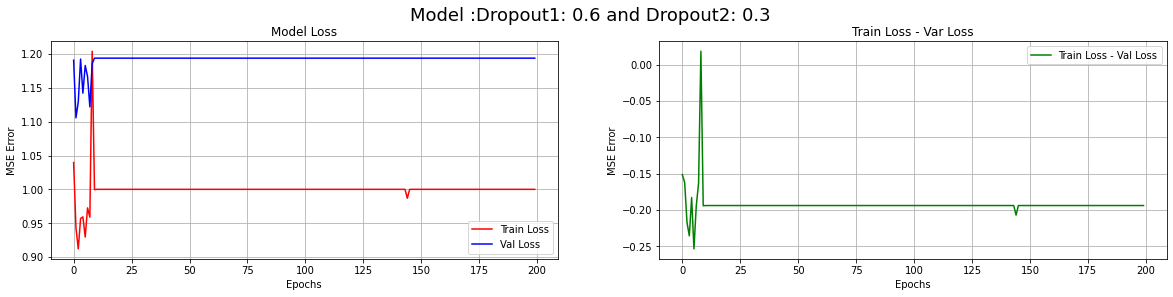

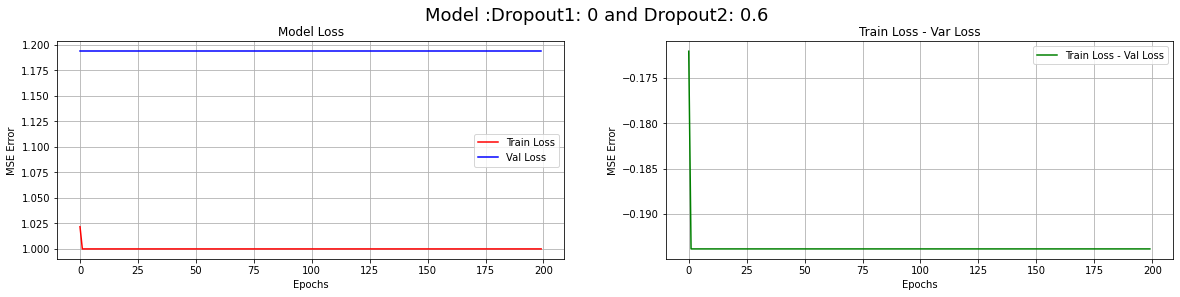

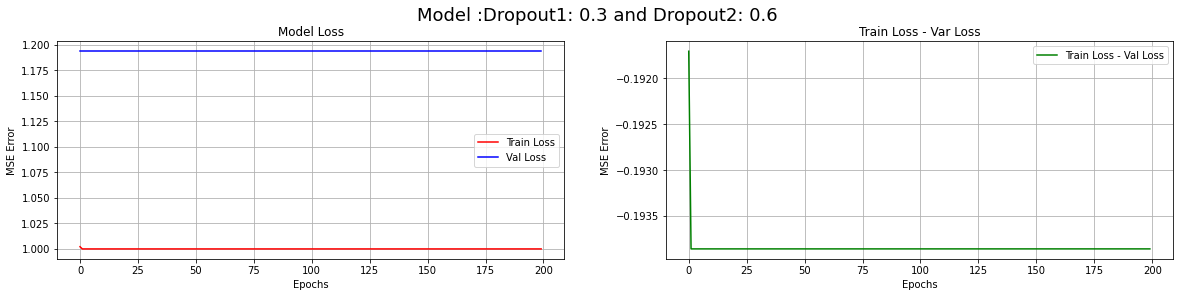

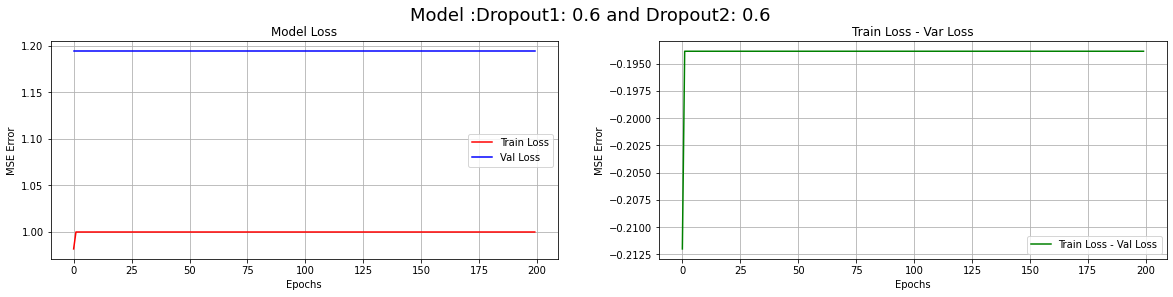

In [ ]:
# Plot
plot_regularization(hist_1_e_ii_1, 'Dropout1: 0 and Dropout2: 0')
plot_regularization(hist_1_e_ii_2, 'Dropout1: 0.3 and Dropout2: 0')
plot_regularization(hist_1_e_ii_3, 'Dropout1: 0.6 and Dropout2: 0')
plot_regularization(hist_1_e_ii_4, 'Dropout1: 0 and Dropout2: 0.3')
plot_regularization(hist_1_e_ii_5, 'Dropout1: 0.3 and Dropout2: 0.3')
plot_regularization(hist_1_e_ii_6, 'Dropout1: 0.6 and Dropout2: 0.3')
plot_regularization(hist_1_e_ii_7, 'Dropout1: 0 and Dropout2: 0.6')
plot_regularization(hist_1_e_ii_8, 'Dropout1: 0.3 and Dropout2: 0.6')
plot_regularization(hist_1_e_ii_9, 'Dropout1: 0.6 and Dropout2: 0.6')

**Respuesta**

El Dropout lo que hace es que por cada nueva entrada a la red en fase de entrenamiento, se desactiva aleatoriamente un porcentaje de las neuronas en cada capa oculta, acorde a lo que se denomina *probabilidad de descarte*.

Es considerado un método de regularización porque su objetivo es impedir que una nuerona 'memorice' parte de la entrada, es decir, evitar el sobreajuste.

**Comentarios**

Un dropout alto en la segunda capa nos muestra una red con poco aprendizaje (pendientes practicamente horizontales de los errores).

0.3/0 - 0.6/0 - 0.3/0.3 fueron las combinaciones que mejoraron el aprendizaje del modelo.

## 1.f Extreme Learning Machines

##### I) Una aproximación para obtener modelos grandes que no sobreajustan es la implementada por ELM. Explique en qué consiste la idea de ELM y por qué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros.

Entrene una ELM de una capa fija y una capa oculta, la primera con un número relativamente grande. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes.

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. 

**Preguntas:** ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

In [ ]:
# Define architecture
input_dense= input_layer.Input(shape=(4000))
dense=layers.Dense(5000, activation='relu',use_bias=True,trainable=False)(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])

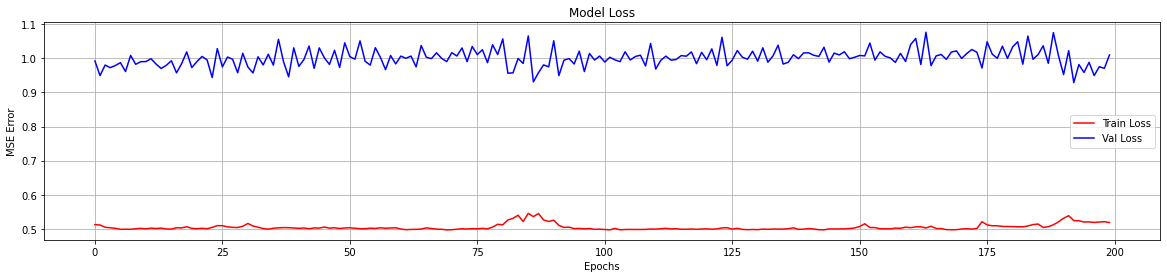

In [ ]:
plt.rcParams["figure.figsize"]=[20,4]

plt.title("Model Loss")
plt.plot(hist.history["loss"],"r", label="Train Loss")
plt.plot(hist.history["val_loss"],"b", label="Val Loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()
plt.show()

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


Explique en qué consiste la idea de ELM y por qué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros.

**Extreme Learning Machine**

ELM consiste en una red neuronal con una capa escondida que tienen nodos que son aleatoriamente asignados y nunca actualizados. Su backpropagation no está basado en el gradiente descendente, sino que utiliza Moore-Penrose generalized inverse para setear los pesos, esto permite que ELM ahorre un tiempo considerable al evitar calcular el gradiente. 

**Respuestas**

¿Cómo se desempeña la red?  El funcionamiento de esta red se podría resumir en tres etapas:
- Selección aleatoria de pesos y bias de la capa oculta
- Calcular la matriz de salida de la capa oculta
- Determinar la matriz de pesos de salida (mediante la formulación matemática de esta red)

¿El número elevado de parámetros totales implica necesariamente overfitting? No.

